# Building Energy Rating Predictive Analysis Study

## Setup

libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
#Check path of working directory
%pwd
#change wd to file location
%cd "d:/Colleges/DCU/A.I/Data Analysis/"
%pip install openpyxl
%pip install mlxtend

d:\Colleges\DCU\A.I\Data Analysis


Data downloaded from Sustainable Energy Authority Ireland
https://ndber.seai.ie/BERResearchTool/ber/search.aspx

Data was rewritten from a .txt file into a .csv file to read into python.

In [2]:

df = pd.read_csv('project/BER/ber.csv', low_memory = False)
#46seconds

Check file loaded correctly

In [3]:
df.shape
df.groupby(['EnergyRating']).count()


,Unnamed: 0,index,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
EnergyRating,,,,,,,,,,,,,,,,,,,,,
A1,967,967,967,967,967,967,967,967,967,967,...,122,123,296,296,296,640,640,640,933,933
A2,44977,44977,44977,44977,44977,44977,44977,44977,44977,44977,...,4445,4452,7615,7615,7615,23336,23336,23336,44723,44723
A3,57818,57818,57818,57818,57818,57818,57818,57818,57818,57818,...,6668,6828,22906,22906,22906,9926,9926,9926,55709,55709
B1,15435,15435,15435,15435,15435,15435,15435,15435,15435,15435,...,2294,2880,11435,11435,11435,3480,3480,3480,9285,9285
B2,33561,33561,33561,33561,33561,33561,33561,33561,33561,33561,...,5154,6212,26690,26690,26690,6863,6863,6863,11390,11390
B3,77900,77900,77900,77900,77900,77900,77900,77900,77900,77900,...,12260,13526,64926,64926,64926,12876,12876,12876,18575,18575
C1,113822,113822,113822,113822,113822,113822,113822,113822,113822,113822,...,17384,18016,96801,96801,96801,14664,14664,14664,20467,20467
C2,123993,123993,123993,123993,123993,123993,123993,123993,123993,123993,...,19348,19570,105174,105174,105174,13896,13896,13896,18950,18950
C3,117541,117541,117541,117541,117541,117541,117541,117541,117541,117541,...,19829,19929,97604,97604,97604,12176,12176,12176,16514,16514


In [3]:
df.head()

,Unnamed: 0,index,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,...,ThirdWallAgeBandId,ThirdWallTypeId,SA_Code,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
0,1,1,Co. Kerry,Detached house,1996,Existing,C3,202.72,262.98,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Co. Donegal,Semi-detached house,2004,Existing,C2,184.06,118.14,0.55,...,NaN,NaN,57106026,0.000222,0.012347,NaN,NaN,NaN,NaN,NaN
2,3,3,Co. Kildare,End of terrace house,1970,Existing,D2,273.58,78.04,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Dublin 8,Mid-floor apartment,2000,Existing,E2,361.76,46.92,0.72,...,9.0,11.0,268085004,0.000320,0.012347,NaN,NaN,NaN,NaN,NaN
4,5,5,Co. Roscommon,Detached house,1981,Existing,B3,139.61,182.66,0.43,...,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summary Statistics

In [4]:
df.describe()


,Unnamed: 0,index,Year_of_Construction,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,...,ThirdWallUValue,ThirdWallAgeBandId,ThirdWallTypeId,prob_smarea_error_0corr,prob_smarea_error_100corr,RER,RenewEPnren,RenewEPren,CPC,EPC
count,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,1.011555e+06,...,180877.000000,176360.000000,180516.000000,7.674620e+05,767462.000000,137865.000000,137865.000000,137865.000000,250431.000000,250431.000000
mean,5.057780e+05,5.057780e+05,1.983602e+03,2.369574e+02,1.134012e+02,6.690783e-01,3.755117e-01,4.317214e-01,2.611958e+00,2.399085e+00,...,0.781850,6.440888,6.358112,1.863817e-02,0.021077,0.122511,20558.034605,1648.581893,1.032138,0.961093
std,2.920109e+05,2.920109e+05,3.365266e+01,1.776136e+02,5.930509e+01,5.633919e-01,5.013500e-01,2.513896e-01,8.565985e-01,1.022362e+00,...,0.632851,3.048832,3.010487,4.481518e-02,0.028883,0.196335,16989.325684,3457.050510,0.969813,0.755433
min,1.000000e+00,1.000000e+00,1.753000e+03,-1.584200e+02,5.470000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.010000,0.000000,1.000000,5.642000e-09,0.002500,0.000000,0.000000,-38584.300000,-3.025000,-0.347000
25%,2.528895e+05,2.528895e+05,1.973000e+03,1.563000e+02,7.765000e+01,3.000000e-01,1.300000e-01,2.900000e-01,2.200000e+00,1.710000e+00,...,0.339000,4.000000,4.000000,1.737855e-06,0.002500,0.000000,8711.740000,0.000000,0.341000,0.371000
50%,5.057780e+05,5.057780e+05,1.997000e+03,2.088500e+02,9.987000e+01,5.200000e-01,2.200000e-01,4.100000e-01,2.700000e+00,3.000000e+00,...,0.550000,7.000000,7.000000,2.218867e-04,0.012347,0.000000,17134.300000,0.000000,0.853000,0.860000
75%,7.586665e+05,7.586665e+05,2.005000e+03,2.840600e+02,1.329500e+02,6.500000e-01,4.000000e-01,6.100000e-01,2.990000e+00,3.000000e+00,...,1.130000,9.000000,8.000000,1.744315e-02,0.028099,0.250000,26791.800000,2481.030000,1.386000,1.301000
max,1.011555e+06,1.011555e+06,2.104000e+03,5.642371e+04,3.546110e+03,5.650000e+00,7.000000e+00,7.760000e+00,7.570000e+00,8.600000e+00,...,10.000000,11.000000,14.000000,9.675549e-01,0.400000,1.626000,604515.000000,101254.000000,13.223000,10.864000


Check empty cells

In [5]:
pd.options.display.min_rows = 214

df.isnull().sum() 


Unnamed: 0                         0
index                              0
CountyName                         0
DwellingTypeDescr                  0
Year_of_Construction               0
TypeofRating                       0
EnergyRating                       0
BerRating                          0
GroundFloorArea(sq m)              0
UValueWall                         0
UValueRoof                         0
UValueFloor                        0
UValueWindow                       0
UvalueDoor                         0
WallArea                           0
RoofArea                           0
FloorArea                          0
WindowArea                         0
DoorArea                           0
NoStoreys                          0
CO2Rating                          0
MainSpaceHeatingFuel           15473
MainWaterHeatingFuel           15473
HSMainSystemEfficiency         15473
MultiDwellingMPRN                  0
TGDLEdition                        0
MPCDERValue                        0
H

Select individual columns with numerical values and high level of completeness based on visual inspection. This was based on visual assessment of the .csv file.

In [85]:
#df.columns.get_loc('CombiBoilerAddLoss')

ber = df[['index', 'CountyName', 
'DwellingTypeDescr', 'Year_of_Construction', 
'TypeofRating', 'EnergyRating', 
'BerRating', 'GroundFloorArea(sq m)', 
'UValueWall', 'UValueRoof', 
'UValueFloor', 'UValueWindow', 
'UvalueDoor', 'WallArea', 
'RoofArea', 'FloorArea', 
'WindowArea', 'DoorArea', 
'NoStoreys', 
'CO2Rating', 
'MainSpaceHeatingFuel', 'MainWaterHeatingFuel', 
'HSMainSystemEfficiency', 'MultiDwellingMPRN', 
'TGDLEdition', 'MPCDERValue', 
'HSEffAdjFactor', 'HSSupplHeatFraction', 
'HSSupplSystemEff', 'WHMainSystemEff', 
'WHEffAdjFactor', 'SupplSHFuel', 
'SupplWHFuel', 'SHRenewableResources', 
'WHRenewableResources', 'NoOfChimneys', 
'NoOfOpenFlues', 'NoOfFansAndVents', 
'NoOfFluelessGasFires', 'DraftLobby', 
'VentilationMethod', 'FanPowerManuDeclaredValue', 
'HeatExchangerEff', 'StructureType', 
'SuspendedWoodenFloor', 'PercentageDraughtStripped', 
'NoOfSidesSheltered', 'PermeabilityTest', 
'PermeabilityTestResult', 'TempAdjustment', 
'HeatSystemControlCat', 'HeatSystemResponseCat', 
'NoCentralHeatingPumps', 'CHBoilerThermostatControlled', 
'NoOilBoilerHeatingPumps', 'OBBoilerThermostatControlled', 
'OBPumpInsideDwelling', 'NoGasBoilerHeatingPumps', 
'WarmAirHeatingSystem', 'UndergroundHeating', 
'GroundFloorUValue', 'DistributionLosses', 
'StorageLosses', 'ManuLossFactorAvail', 
'SolarHotWaterHeating', 'ElecImmersionInSummer', 
'CombiBoiler', 'KeepHotFacility', 
'WaterStorageVolume', 'DeclaredLossFactor', 
'TempFactorUnadj', 'TempFactorMultiplier', 
'InsulationType', 'InsulationThickness', 
'PrimaryCircuitLoss',
# "CombiBoilerAddLoss",
# "ElecConsumpKeepHot",
# "ApertureArea",
# "ZeroLossCollectorEff",
# "CollectorHeatLossCoEff",
# "AnnualSolarRadiation",
# "OvershadingFactor",
# "CylinderStat",
# "SolarStorageVolume",
# "VolumeOfPreHeatStore",
# "CombinedCylinder",
# "ElectricityConsumption",
# "SWHPumpSolarPowered",
# "ChargingBasisHeatConsumed",
# "gsdHSSupplHeatFraction",
# "gsdHSSupplSystemEff",
# "DistLossFactor",
# "CHPUnitHeatFraction",
# "CHPSystemType",
# "CHPElecEff",
# "CHPHeatEff",
# "CHPFuelType",
# "SupplHSFuelTypeID",
# "gsdSHRenewableResources",
# "gsdWHRenewableResources",
# "SolarHeatFraction",
'DeliveredLightingEnergy', 
'DeliveredEnergyPumpsFans', 'DeliveredEnergyMainWater', 
'DeliveredEnergyMainSpace', 
#'PrimaryEnergyLighting', 
#'PrimaryEnergyPumpsFans', 
#'PrimaryEnergyMainWater', 
#'PrimaryEnergyMainSpace', 
#'CO2Lighting', 
#'CO2PumpsFans', 
#'CO2MainWater', 
#'CO2MainSpace', 
'GroundFloorArea', 
'GroundFloorHeight', 'FirstFloorArea', 
'FirstFloorHeight', 
# "FirstFloorHeight",
# "SecondFloorArea",
# "SecondFloorHeight",
# "ThirdFloorArea",
# "ThirdFloorHeight",

'ThermalBridgingFactor', 
'ThermalMassCategory', 'PredominantRoofTypeArea', 
'PredominantRoofType', 'LowEnergyLightingPercent', 
#'TotalDeliveredEnergy', 
'DeliveredEnergySecondarySpace', 
#'DeliveredEnergySupplementaryWater', 
'LivingAreaPercent', 
#'CO2SecondarySpace', 
#'CO2SupplementaryWater', 
#'PrimaryEnergySecondarySpace', 
#'PrimaryEnergySupplementaryWater', 
'HESSchemeUpgrade', 'RoomInRoofArea', 
'PurposeOfRating', 'DateOfAssessment', 
# "FirstEnergyTypeId",
# "FirstEnergyType_Description","
# "FirstEnerProdComment",
# "FirstEnerProdDelivered","
# "FirstPartLTotalContribution",
# "FirstEnerProdConvFactor","
# "FirstEnerProdCO2EmissionFactor",
# "FirstEnerConsumedComment","
# "FirstEnerConsumedDelivered",
# "FirstEnerConsumedConvFactor","
# "FirstEnerConsumedCO2EmissionFactor",
# "SecondEnergyTypeId","
# "SecondEnergyType_Description",
# "SecondEnerProdComment","
# "SecondEnerProdDelivered",
# "SecondPartLTotalContribution","
# "SecondEnerProdConvFactor",
# "SecondEnerProdCO2EmissionFactor","
# "SecondEnerConsumedComment",
# "SecondEnerConsumedDelivered","
# "SecondEnerConsumedConvFactor",
# "SecondEnerConsumedCO2EmissionFactor","
# "ThirdEnergyTypeId",
# "ThirdEnergyType_Description","
# "ThirdEnerProdComment",
# "ThirdEnerProdDelivered","
# "ThirdPartLTotalContribution",
# "ThirdEnerProdConvFactor","
# "ThirdEnerProdCO2EmissionFactor",
# "ThirdEnerConsumedComment","
# "ThirdEnerConsumedDelivered",
# "ThirdEnerConsumedConvFactor","
# "ThirdEnerConsumedCO2EmissionFactor",
# "FirstBoilerFuelType","
# "FirstHeatGenPlantEff",
# "FirstPercentageHeat","
# "SecondBoilerFuelType",
# "SecondHeatGenPlantEff","
# "SecondPercentageHeat",
# "ThirdBoilerFuelType","
# "ThirdHeatGenPlantEff",
# "ThirdPercentageHeat","
# "SolarSpaceHeatingSystem",
# "TotalPrimaryEnergyFact","
# "TotalCO2Emissions",

'FirstWallDescription',
'FirstWallArea', 
'FirstWallUValue',
'FirstWallIsSemiExposed', 
'FirstWallAgeBandId',

'FirstWallTypeId', 
#'SecondWallType_Description', 'SecondWallDescription', 
#'SecondWallArea', 
#'SecondWallUValue', 
'SecondWallIsSemiExposed', 
# 'SecondWallAgeBandId', 
#'SecondWallTypeId',
# 'ThirdWallType_Description', 
#'ThirdWallDescription', 'ThirdWallArea', 
#'ThirdWallUValue', 'ThirdWallIsSemiExposed', 
#'ThirdWallAgeBandId', 'ThirdWallTypeId', 
'SA_Code']]
# prob_smarea_error_0corr
# prob_smarea_error_100corr
# RER
#'RenewEPnren',
# 'RenewEPren', 
#'CPC', 'EPC']] 

Recheck which columns are not null

In [5]:
ber.isnull().sum() 


index                                   0
CountyName                              0
DwellingTypeDescr                       0
Year_of_Construction                    0
TypeofRating                            0
EnergyRating                            0
BerRating                               0
GroundFloorArea(sq m)                   0
UValueWall                              0
UValueRoof                              0
UValueFloor                             0
UValueWindow                            0
UvalueDoor                              0
WallArea                                0
RoofArea                                0
FloorArea                               0
WindowArea                              0
DoorArea                                0
NoStoreys                               0
CO2Rating                               0
MainSpaceHeatingFuel                15473
MainWaterHeatingFuel                15473
HSMainSystemEfficiency              15473
MultiDwellingMPRN                 

## Exploratory Data Analysis
Outliers are present in Building Energy Rating (BerRating) column to predict.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

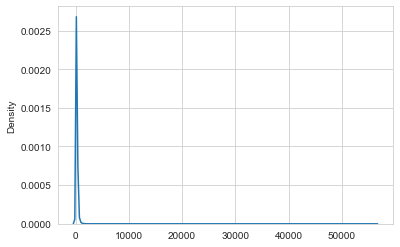

In [4]:
# Import the libraries
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
# matplotlib histogram
is_numeric_dtype(ber['BerRating'])
sns.set_style('whitegrid')
#density plot
sns.kdeplot(np.array(ber['BerRating']), bw=0.5)



Boxplot and density plot not appearing as expected due to extreme outliers skewing the dataset.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BerRating'>

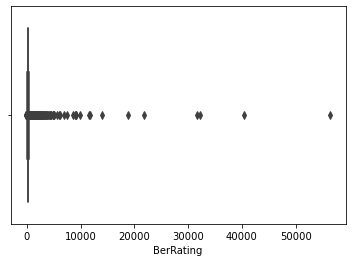

In [7]:
sns.boxplot(ber['BerRating'])


This was initial method which was later replaced by median absolute deviation. 
Find outliers three standard deviations from the mean, beyond the 99.7% or 0.3% of expected values.

In [69]:
print("Highest allowed",ber['BerRating'].mean() + 3*ber['BerRating'].std())
print("Lowest allowed",ber['BerRating'].mean() - 3*ber['BerRating'].std())


Highest allowed 769.7982060534331
Lowest allowed -295.88333674824037


In [47]:
def remove_outliers(data, max_deviation=3.5):

    median = np.median(data)
    b_value = 1.4826  # value for normal distribution
    mad = b_value * np.median(np.abs(data - median))

    if mad > 0:
        deviation = abs(data - median) / mad
        """
        outliers = data[deviation > max_deviation]
        print "outliers removed {}".format(len(outliers))
        print outliers
        """
        data = data[deviation <= max_deviation]
    return data

berNormal = remove_outliers(ber["BerRating"])
#remove_outliers(ber['BerRating'])
berNormal = ber[ber['BerRating'].isin(berNormal)]

Outliers detected 12161. All G rated buildings

Isolate outliers

In [73]:
berOutliers = ber[ (ber['BerRating'] > (ber['BerRating'].mean() + 3*ber['BerRating'].std() )) |
    (ber['BerRating'] < (ber['BerRating'].mean() - 3*ber['BerRating'].std() )) ]

In [74]:
berOutliers.groupby(['EnergyRating']).count()


,level_0,index,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,...,PurposeOfRating,DateOfAssessment,FirstWallDescription,FirstWallArea,FirstWallUValue,FirstWallIsSemiExposed,FirstWallAgeBandId,FirstWallTypeId,SecondWallIsSemiExposed,SA_Code
EnergyRating,,,,,,,,,,,,,,,,,,,,,
G,12161,12161,12161,12161,12161,12161,12161,12161,12161,12161,...,12161,12161,7530,12158,12158,12158,12155,12158,7114,7121


Isolate normalised dataset, without outliers.

In [87]:
berNormal = ber[ (ber['BerRating'] <= (ber['BerRating'].mean() + 3*ber['BerRating'].std() )) &
    (ber['BerRating'] >= (ber['BerRating'].mean() - 3*ber['BerRating'].std() )) ]

Recheck normalised BER dataset.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

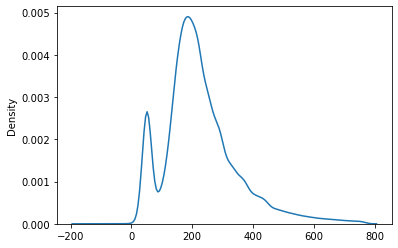

In [76]:
sns.kdeplot(np.array(berNormal['BerRating']), 
#log_scale=True,
bw=0.1)


Possible bi-modal data. Check other main variables for normailty. 

<AxesSubplot:ylabel='Density'>

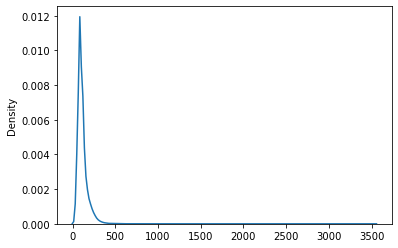

In [78]:
#sns.kdeplot(np.array(berNormal[ 'UValueWall']),  bw=0.5)
#sns.kdeplot(np.array(berNormal[ 'TempAdjustment']))
#sns.kdeplot(np.array(berNormal[ 'HeatSystemResponseCat']))
#sns.kdeplot(np.array(berNormal[ 'UValueRoof']))
#sns.kdeplot(np.array(berNormal[ 'UValueFloor']), bw = 0.5)
#sns.kdeplot(np.array(berNormal[ 'NoStoreys']))
#sns.kdeplot(np.array(berNormal[ 'WHMainSystemEff']))
sns.kdeplot(np.array(berNormal[ 'GroundFloorArea(sq m)']))


C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

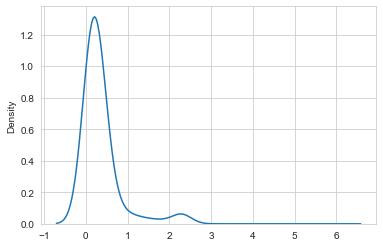

In [19]:
sns.kdeplot(np.array(berNormal['UValueRoof']), bw=0.5)

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BerRating'>

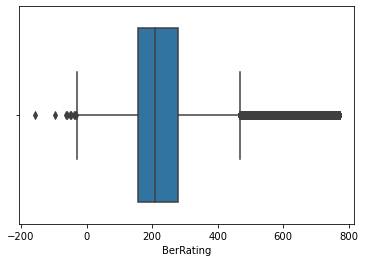

In [84]:
sns.boxplot(berNormal['BerRating'])


Check variables types

In [22]:
berNormal.dtypes

index                                int64
CountyName                          object
DwellingTypeDescr                   object
Year_of_Construction                 int64
TypeofRating                        object
EnergyRating                        object
BerRating                          float64
GroundFloorArea(sq m)              float64
UValueWall                         float64
UValueRoof                         float64
UValueFloor                        float64
UValueWindow                       float64
UvalueDoor                         float64
WallArea                           float64
RoofArea                           float64
FloorArea                          float64
WindowArea                         float64
DoorArea                           float64
NoStoreys                            int64
CO2Rating                          float64
MainSpaceHeatingFuel                object
MainWaterHeatingFuel                object
HSMainSystemEfficiency             float64
MultiDwelli

Scatterplot of BER rating and U-Value wall

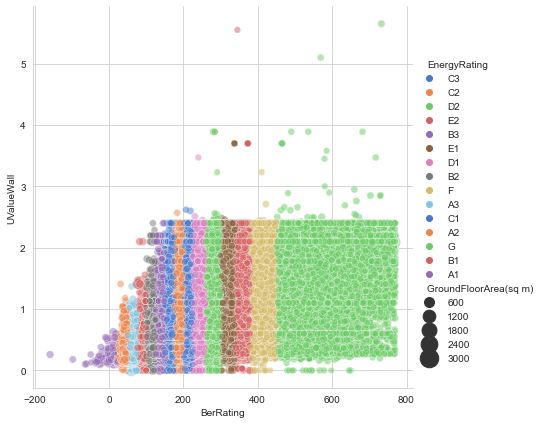

In [16]:



sns.relplot(x = "BerRating", y= "UValueWall", 
hue="EnergyRating", 
size="GroundFloorArea(sq m)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, 
          
            data= berNormal )



Scatterplot of BER rating and U-Value Window

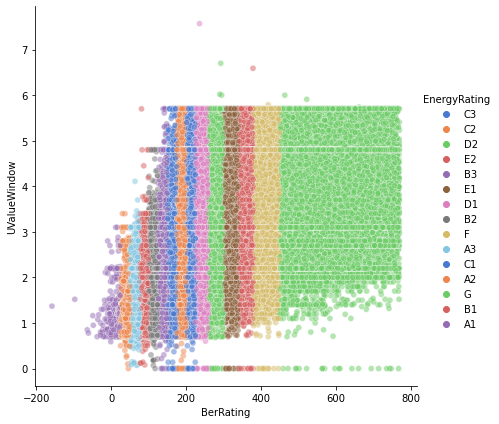

In [80]:

sns.relplot(x = "BerRating", y= "UValueWindow", 
hue="EnergyRating", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, 
        
            data= berNormal )


Check variables with high correlation. CO2 is derived from BER, hence the strong correlation. 

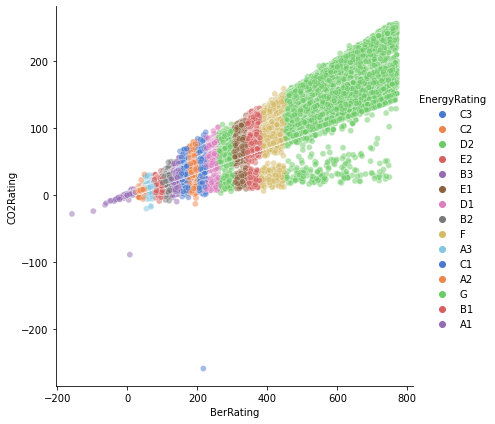

In [88]:
sns.relplot(x = "BerRating", y= "CO2Rating", 
hue="EnergyRating", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, 
        
            data= berNormal )

In [31]:
# Abondoned method of outlier detection and removal using local outlier factor.

#clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
#X = berNormal[['BerRating', 'GroundFloorArea(sq m)']]
#'GroundFloorArea(sq m)']]
#y_pred = clf.fit_predict(X)
#X_scores = clf.negative_outlier_factor_
#y_pred = pd.DataFrame(y_pred)
#y_pred.groupby([0]).count()
#y_pred.value_counts(y_pred[0], sort=True, ascending=False)

Savepoint

In [8]:
#999394 rows, 101 columns
#berNormal.to_pickle('project/berNormal.pkl')
berNormal = pd.read_pickle("project/berNormal.pkl")

Isolate numerical and catergorical variables

In [89]:
berNormal.dtypes

index                              int64
CountyName                        object
DwellingTypeDescr                 object
Year_of_Construction               int64
TypeofRating                      object
EnergyRating                      object
BerRating                        float64
GroundFloorArea(sq m)            float64
UValueWall                       float64
UValueRoof                       float64
UValueFloor                      float64
UValueWindow                     float64
UvalueDoor                       float64
WallArea                         float64
RoofArea                         float64
FloorArea                        float64
WindowArea                       float64
DoorArea                         float64
NoStoreys                          int64
CO2Rating                        float64
MainSpaceHeatingFuel              object
MainWaterHeatingFuel              object
HSMainSystemEfficiency           float64
MultiDwellingMPRN                 object
TGDLEdition     

In [116]:
# 80 numerical variables 
cols = berNormal.select_dtypes(include=[np.float64,np.int64 ]).columns
ber_num =  berNormal[cols].astype(np.float64,np.int64)


In [91]:
ber_num.dtypes
#values get changed from int64 to float64

index                            float64
Year_of_Construction             float64
BerRating                        float64
GroundFloorArea(sq m)            float64
UValueWall                       float64
UValueRoof                       float64
UValueFloor                      float64
UValueWindow                     float64
UvalueDoor                       float64
WallArea                         float64
RoofArea                         float64
FloorArea                        float64
WindowArea                       float64
DoorArea                         float64
NoStoreys                        float64
CO2Rating                        float64
HSMainSystemEfficiency           float64
TGDLEdition                      float64
MPCDERValue                      float64
HSEffAdjFactor                   float64
HSSupplHeatFraction              float64
HSSupplSystemEff                 float64
WHMainSystemEff                  float64
WHEffAdjFactor                   float64
SupplSHFuel     

In [92]:
# 33 catergorical variables
cols_cat = berNormal.select_dtypes(include=[object ]).columns
ber_cat =  berNormal[cols_cat].astype(object)


Check variables content

In [94]:
#ber_cat.groupby(['CountyName'])['CountyName'].count()
ber_cat.groupby(['DwellingTypeDescr'])['DwellingTypeDescr'].count()
#ber_cat.groupby(['TypeofRating'])['TypeofRating'].count()
#ber_cat.groupby(['MainSpaceHeatingFuel'])['MainSpaceHeatingFuel'].count()
#ber_cat.groupby(['MainWaterHeatingFuel'])['MainWaterHeatingFuel'].count()
#ber_cat.groupby(['MultiDwellingMPRN'])['MultiDwellingMPRN'].count()
#ber_cat.groupby(['DraftLobby'])['DraftLobby'].count()
#ber_cat.groupby(['VentilationMethod'])['VentilationMethod'].count()
#ber_cat.groupby(['StructureType'])['StructureType'].count() #please select
#ber_cat.groupby(['PermeabilityTest'])['PermeabilityTest'].count()
#ber_cat.groupby(['CHBoilerThermostatControlled'])['CHBoilerThermostatControlled'].count()
#ber_cat.groupby(['OBBoilerThermostatControlled'])['OBBoilerThermostatControlled'].count()
#ber_cat.groupby(['OBPumpInsideDwelling'])['OBPumpInsideDwelling'].count()
#ber_cat.groupby(['WarmAirHeatingSystem'])['WarmAirHeatingSystem'].count()
#ber_cat.groupby(['UndergroundHeating'])['UndergroundHeating'].count()
#ber_cat.groupby(['StorageLosses'])['StorageLosses'].count()
#ber_cat.groupby(['ManuLossFactorAvail'])['ManuLossFactorAvail'].count()
#ber_cat.groupby(['SolarHotWaterHeating'])['SolarHotWaterHeating'].count()
#ber_cat.groupby(['ElecImmersionInSummer'])['ElecImmersionInSummer'].count()
#ber_cat.groupby(['CombiBoiler'])['CombiBoiler'].count()
#ber_cat.groupby(['KeepHotFacility'])['KeepHotFacility'].count()
#ber_cat.groupby(['InsulationType'])['InsulationType'].count()
#ber_cat.groupby(['PrimaryCircuitLoss'])['PrimaryCircuitLoss'].count()
#ber_cat.groupby(['ThermalMassCategory'])['ThermalMassCategory'].count()
#ber_cat.groupby(['PurposeOfRating'])['PurposeOfRating'].count()
#ber_cat.groupby(['FirstWallDescription'])['FirstWallDescription'].count()
#ber_cat.groupby(['FirstWallIsSemiExposed'])['FirstWallIsSemiExposed'].count()
#ber_cat.groupby(['SecondWallIsSemiExposed'])['SecondWallIsSemiExposed'].count()


DwellingTypeDescr
Apartment                   3457
Basement Dwelling            311
Detached house            274982
End of terrace house       76826
Ground-floor apartment     54829
House                      34016
Maisonette                 11358
Mid-floor apartment        68817
Mid-terrace house         143160
Semi-detached house       275710
Top-floor apartment        55928
Name: DwellingTypeDescr, dtype: int64

Catergorical Variables

In [95]:
# remove some cat variables with poor data, 10 variables left
ber_cat = ber_cat.drop(['EnergyRating', 'PermeabilityTest', 'DateOfAssessment', 'CountyName', 
'TypeofRating', 'MainSpaceHeatingFuel', 'MainWaterHeatingFuel', 'MultiDwellingMPRN',
'VentilationMethod', 'StructureType', 'OBBoilerThermostatControlled','KeepHotFacility', 
'OBPumpInsideDwelling', 'WarmAirHeatingSystem', 'UndergroundHeating', 'StorageLosses',
'ManuLossFactorAvail', 'SolarHotWaterHeating', 'CombiBoiler', 'KeepHotFacility',
'PurposeOfRating', 'FirstWallDescription', 'FirstWallIsSemiExposed', 'SecondWallIsSemiExposed'], axis = 1)


In [55]:
# one hot encode
ber_cat = pd.get_dummies(ber_cat)


catergorical checkpoint

In [266]:

#ber_cat.to_pickle('project/ber_cat.pkl')
ber_cat = pd.read_pickle("project/ber_cat.pkl")

Simple Linear Regression

In [119]:
# 
X = pd.DataFrame(ber_num['BerRating'])
y = pd.DataFrame(ber_num['UValueWall']) #45%
#y = pd.DataFrame(ber_num['UValueWindow']) #39%

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.4576031293101984, 0.45938726739161595, 0.4609026104619728]


Savepoint

In [120]:
ber_num.to_pickle('project/ber_num.pkl')
#ber_clean= pd.read_pickle("project/ber_clean.pkl")

Check correlation

Create correlation matrix for mulitply linear regression.

In [98]:
corr_plot = round(ber_num.corr(),2)
#Write to excel for further analysis
corr_plot.to_excel(r'corrplot.xlsx', index = False)

Find and remove variables relating to CO2

In [100]:
CO2_cols = [col for col in df.columns if 'CO2' in col]
print(CO2_cols)

['CO2Rating', 'CO2Lighting', 'CO2PumpsFans', 'CO2MainWater', 'CO2MainSpace', 'CO2SecondarySpace', 'CO2SupplementaryWater', 'FirstEnerProdCO2EmissionFactor', 'FirstEnerConsumedCO2EmissionFactor', 'SecondEnerProdCO2EmissionFactor', 'SecondEnerConsumedCO2EmissionFactor', 'ThirdEnerProdCO2EmissionFactor', 'ThirdEnerConsumedCO2EmissionFactor', 'TotalCO2Emissions']


In [121]:
#high correlation for the same thematic underlying variables ~ CO2, AREA
#FirstWallArea - GroundFloorArea
#FirstWallUValue - UValueWall
#73 variables
ber_num = ber_num.drop(['CO2Rating'
                        #,'MPCDERValue','CO2Lighting', 'CO2PumpsFans', 'CO2MainWater', 'CO2MainSpace', 'CO2SecondarySpace'
                        ], axis = 1)

Find and remove columns relating to area

In [103]:
Area_cols = [col for col in ber_num.columns if 'Area' in col]
print(Area_cols)

['GroundFloorArea(sq m)', 'WallArea', 'RoofArea', 'FloorArea', 'WindowArea', 'DoorArea', 'GroundFloorArea', 'FirstFloorArea', 'PredominantRoofTypeArea', 'LivingAreaPercent', 'RoomInRoofArea', 'FirstWallArea']


In [136]:
#Check correlations
area_df = ber_num[['BerRating','GroundFloorArea(sq m)', 'WallArea', 'RoofArea', 'FloorArea', 
'WindowArea', 'DoorArea', 'GroundFloorArea', 'FirstFloorArea',
'PredominantRoofTypeArea', 'LivingAreaPercent', 'RoomInRoofArea', 'FirstWallArea']]
area_cp = round(area_df.corr(),2)
area_cp.style.background_gradient(cmap='coolwarm')

,BerRating,GroundFloorArea(sq m),WallArea,RoofArea,FloorArea,WindowArea,DoorArea,GroundFloorArea,FirstFloorArea,PredominantRoofTypeArea,LivingAreaPercent,RoomInRoofArea,FirstWallArea
BerRating,1.000000,-0.280000,-0.100000,0.010000,0.020000,-0.200000,0.050000,-0.050000,-0.310000,-0.020000,0.150000,-0.010000,-0.160000
GroundFloorArea(sq m),-0.280000,1.000000,0.810000,0.760000,0.730000,0.710000,0.260000,0.690000,0.530000,0.540000,-0.580000,0.260000,0.690000
WallArea,-0.100000,0.810000,1.000000,0.610000,0.620000,0.570000,0.300000,0.510000,0.540000,0.370000,-0.530000,0.080000,0.870000
RoofArea,0.010000,0.760000,0.610000,1.000000,0.800000,0.550000,0.270000,0.760000,0.110000,0.850000,-0.470000,0.340000,0.510000
FloorArea,0.020000,0.730000,0.620000,0.800000,1.000000,0.540000,0.280000,0.810000,0.080000,0.700000,-0.460000,0.160000,0.520000
WindowArea,-0.200000,0.710000,0.570000,0.550000,0.540000,1.000000,0.090000,0.560000,0.320000,0.420000,-0.360000,0.140000,0.480000
DoorArea,0.050000,0.260000,0.300000,0.270000,0.280000,0.090000,1.000000,0.180000,0.170000,0.140000,-0.270000,0.040000,0.270000
GroundFloorArea,-0.050000,0.690000,0.510000,0.760000,0.810000,0.560000,0.180000,1.000000,-0.160000,0.780000,-0.260000,0.150000,0.400000
FirstFloorArea,-0.310000,0.530000,0.540000,0.110000,0.080000,0.320000,0.170000,-0.160000,1.000000,-0.230000,-0.500000,-0.130000,0.520000
PredominantRoofTypeArea,-0.020000,0.540000,0.370000,0.850000,0.700000,0.420000,0.140000,0.780000,-0.230000,1.000000,-0.240000,0.260000,0.370000


Check normality for main predicators identified from stepwise regression.

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FirstFloorArea'>

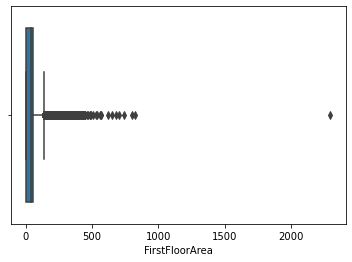

In [107]:
#sns.boxplot(ber_num['GroundFloorArea(sq m)']) #outliers
#sns.boxplot(ber_clean['WallArea']) #outliers
#sns.boxplot(ber_clean['RoofArea']) #outliers
#sns.boxplot(ber_clean['FloorArea']) #outliers
#sns.boxplot(ber_clean['WindowArea']) #outliers
#sns.boxplot(ber_clean['DoorArea']) #outliers
#sns.boxplot(ber_clean['GroundFloorArea']) #outliers
sns.boxplot(ber_num['FirstFloorArea']) #outliers
#sns.boxplot(ber_clean['PredominantRoofTypeArea']) #outliers
#sns.boxplot(ber_clean['LivingAreaPercent']) #outliers
#sns.boxplot(ber_clean['RoomInRoofArea']) #outliers
#sns.boxplot(ber_clean['FirstWallArea']) #outliers







Use median absolute deviation, instead of mean s.d. due to outliers affecting the mean. 

In [108]:
def remove_outliers(data, max_deviation=3.5):

    median = np.median(data)
    b_value = 1.4826  # value for normal distribution
    mad = b_value * np.median(np.abs(data - median))

    if mad > 0:
        deviation = abs(data - median) / mad
        """
        outliers = data[deviation > max_deviation]
        print "outliers removed {}".format(len(outliers))
        print outliers
        """
        data = data[deviation <= max_deviation]
    return data


In [123]:
cleaned = remove_outliers(ber_num["GroundFloorArea(sq m)"])
ber_num = ber_num[ber_num['GroundFloorArea(sq m)'].isin(cleaned)]


C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GroundFloorArea(sq m)'>

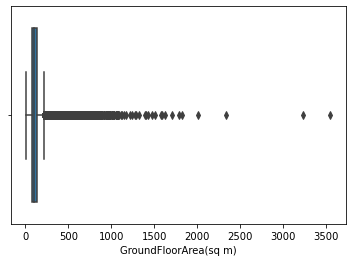

In [124]:
sns.boxplot(berNormal['GroundFloorArea(sq m)']) #outliers


C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GroundFloorArea(sq m)'>

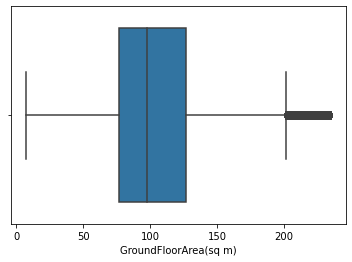

In [125]:
sns.boxplot(ber_num['GroundFloorArea(sq m)']) #outliers


In [115]:
cleaned = remove_outliers(ber_num["FirstFloorHeight"])
ber_num = ber_num[ber_num['FirstFloorHeight'].isin(cleaned)]

In [129]:
target = "FirstFloorHeight"
cleaned = remove_outliers(ber_num[target])
ber_num = ber_num[ber_num[target].isin(cleaned)]

In [131]:
target = "UValueWall"
cleaned = remove_outliers(ber_num[target])
ber_num = ber_num[ber_num[target].isin(cleaned)]

Isolate variables from stepwise regression.

In [149]:
ber_data = ber_num[['BerRating', 
'UValueWall', #
'UValueFloor', #
'HeatSystemResponseCat', #
'TempAdjustment', #
'UValueRoof', #
'WHMainSystemEff', #7
'NoStoreys',
'GroundFloorArea(sq m)', #  r2 0.780  rms 56.44  AIC 1.071e+07
'FirstFloorHeight'  #  r2  0.799 rms 53.94 AIC 1.068e+07
]]
#remove empty cells for multiply linear regression
ber_data = ber_data.dropna() #964,869
      

#Clean data before logarthimatic transformation

In [150]:
ber_data['FirstFloorHeight'] = ber_data['FirstFloorHeight'].replace(0,1) # Replace 0 with 1

create one variable of voluem to represent two variables

In [151]:
ber_data["volume"] = ber_data["GroundFloorArea(sq m)"] * ber_data["FirstFloorHeight"]
ber_data["Temp2"] =  ber_data["TempAdjustment"] + 1.25
ber_data["System2"] =  ber_data["HeatSystemResponseCat"] + 3
ber_data["HeatSystem"] =  ber_data["System2"] /ber_data["Temp2"] 

In [135]:
#Check correlation amongst selected variables
corr_plot = round(ber_data.corr(),2)
corr_plot.style.background_gradient(cmap='coolwarm')

,BerRating,UValueWall,UValueFloor,HeatSystemResponseCat,TempAdjustment,UValueRoof,WHMainSystemEff,NoStoreys,GroundFloorArea(sq m),FirstFloorHeight,volume,Temp2,System2,HeatSystem
BerRating,1.000000,0.550000,0.510000,0.290000,0.490000,0.400000,-0.460000,-0.280000,-0.290000,-0.270000,-0.330000,0.490000,0.290000,-0.130000
UValueWall,0.550000,1.000000,0.300000,0.010000,0.180000,0.400000,-0.240000,-0.100000,-0.110000,-0.110000,-0.120000,0.180000,0.010000,-0.120000
UValueFloor,0.510000,0.300000,1.000000,-0.140000,0.310000,0.300000,-0.310000,0.090000,0.050000,0.090000,0.030000,0.310000,-0.140000,-0.330000
HeatSystemResponseCat,0.290000,0.010000,-0.140000,1.000000,0.060000,-0.070000,0.080000,-0.180000,-0.190000,-0.180000,-0.170000,0.060000,1.000000,0.720000
TempAdjustment,0.490000,0.180000,0.310000,0.060000,1.000000,0.130000,-0.280000,-0.100000,-0.020000,-0.100000,-0.120000,1.000000,0.060000,-0.640000
UValueRoof,0.400000,0.400000,0.300000,-0.070000,0.130000,1.000000,-0.130000,0.150000,0.080000,0.100000,0.090000,0.130000,-0.070000,-0.150000
WHMainSystemEff,-0.460000,-0.240000,-0.310000,0.080000,-0.280000,-0.130000,1.000000,0.050000,0.070000,0.050000,0.100000,-0.280000,0.080000,0.270000
NoStoreys,-0.280000,-0.100000,0.090000,-0.180000,-0.100000,0.150000,0.050000,1.000000,0.380000,0.840000,0.780000,-0.100000,-0.180000,-0.060000
GroundFloorArea(sq m),-0.290000,-0.110000,0.050000,-0.190000,-0.020000,0.080000,0.070000,0.380000,1.000000,0.280000,0.590000,-0.020000,-0.190000,-0.110000
FirstFloorHeight,-0.270000,-0.110000,0.090000,-0.180000,-0.100000,0.100000,0.050000,0.840000,0.280000,1.000000,0.880000,-0.100000,-0.180000,-0.070000


In [152]:
#remove instances where values are zero
ber_data = ber_data[ber_data.UValueWall != 0]
ber_data = ber_data[ber_data.UValueFloor != 0]
ber_data = ber_data[ber_data.UValueRoof != 0]


In [153]:
#Six final variables selected.
ber_data = ber_data[['BerRating', 
'UValueWall', #
'UValueFloor', #
#'HeatSystemResponseCat', #
#'TempAdjustment', #
'UValueRoof', #
'WHMainSystemEff', #7
"volume",
"HeatSystem"
#'NoStoreys',
#'GroundFloorArea(sq m)', #  r2 0.780  rms 56.44  AIC 1.071e+07
#'FirstFloorHeight'  #  r2  0.799 rms 53.94 AIC 1.068e+07
]]
ber_data = ber_data.dropna() #964,869

Logarithmatic transform all variables

In [154]:
ber_data_lg = ber_data.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
ber_data_lg = ber_data_lg.dropna()

C:\Users\jetpr\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [155]:
import statsmodels.api as sm
x = ber_data_lg.drop('BerRating',axis=1)
y = ber_data_lg['BerRating']
ks = sm.OLS(y, x)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BerRating   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          9.317e+06
Date:                Sat, 09 Apr 2022   Prob (F-statistic):                        0.00
Time:                        01:01:47   Log-Likelihood:                         -27576.
No. Observations:              694461   AIC:                                  5.516e+04
Df Residuals:                  694455   BIC:                                  5.523e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
UValueWall          0.3417      0.002    187.140      0.000       0.338       0.345
UValueFloor         1.0666      0.002    592.825      0.000       1.063       1.070
UValueRoof         -0.0818      0.001    -60.342      0.000      -0.084      -0.079
WHMainSystemEff     1.0658      0.002    699.780      0.000       1.063       1.069
volume              0.2604      0.001    246.107      0.000       0.258       0.262
HeatSystem          0.1255      0.003     36.758      0.000       0.119       0.132
==============================================================================
Omnibus:                    62163.646   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170402.870
Skew:                          -0.506   Prob(JB):                         0.00
Kurtosis:                       5.206   Cond. No.                         37.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.8325193605948807
mean_sqrd_error is== 0.010191498709216798
root_mean_squared error of is== 0.10095295294946452


In [157]:
ber_mean = ber_data['BerRating'].mean()
ber_mean  * .1 
#root_mean_square greater than 10% of the mean ber rating.

20.7679676198815

Check coefficents of predicators

In [62]:
pd.DataFrame(LR.coef_, x.columns, columns = ['Coeff'])


,Coeff
UValueWall,67.288071
UValueFloor,175.329922
UValueRoof,64.055906
WHMainSystemEff,-0.541752
volume,-0.169061
HeatSystem,1.706166


Check prediction versus real. Outliers still affecting the data

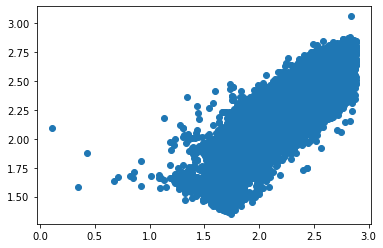

In [158]:
predictions = LR.predict(x_test)
plt.scatter(y_test, predictions)


(array([1.00000e+00, 0.00000e+00, 2.00000e+00, 4.00000e+00, 2.70000e+01,
        1.94000e+02, 1.54200e+04, 1.16311e+05, 6.84000e+03, 9.40000e+01]),
 array([-1.98466083, -1.71704121, -1.4494216 , -1.18180199, -0.91418237,
        -0.64656276, -0.37894314, -0.11132353,  0.15629609,  0.4239157 ,
         0.69153532]),
 <BarContainer object of 10 artists>)

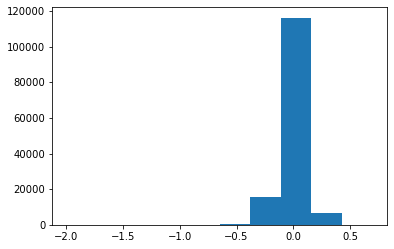

In [159]:
plt.hist(y_test - predictions)


In [66]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)
np.sqrt(metrics.mean_squared_error(y_test, predictions))



64.81116391842066

Stepwise backwards Regression to identify main predictors

In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,
k_features = 20,
forward= False,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

In [74]:
#
sfs1.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8)

In [75]:
x_train.iloc[:, [ 0,4,2,1,5,3, 6, 7,8
                 #,6,7]].columns
]].columns

Index(['UValueWall', 'UValueFloor', 'HeatSystemResponseCat', 'TempAdjustment',
       'NoStoreys', 'UValueRoof', 'WHMainSystemEff', 'GroundFloorArea(sq m)',
       'FirstFloorHeight'],
      dtype='object')

In [40]:
# Checkdifferent combiantions
#x_train.iloc[:, [ 2, 3, 4, 36, 53, 54, 65]].columns
#Index(['GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof',
#       'HeatSystemResponseCat', 'PrimaryEnergyMainWater',
#       'PrimaryEnergyMainSpace', 'PrimaryEnergySupplementaryWater'],
#      dtype='object')
x_train.iloc[:, [ 2, 3, 4, 5, 36, 53, 54, 58, 65]].columns
#Index(['GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor',
#       'HeatSystemResponseCat', 'PrimaryEnergyMainWater',
#       'PrimaryEnergyMainSpace', 'FirstFloorHeight',
#       'PrimaryEnergySupplementaryWater'],
#      dtype='object')

Index(['GroundFloorArea(sq m)', 'UValueWall', 'UValueRoof', 'UValueFloor',
       'HeatSystemResponseCat', 'PrimaryEnergyMainWater',
       'PrimaryEnergyMainSpace', 'FirstFloorHeight',
       'PrimaryEnergySupplementaryWater'],
      dtype='object')

In [197]:
#forward
x_train.iloc[:, [ 1, 6,7, 2, 3, 4, 5]].columns


Index(['UValueWall', 'TempAdjustment', 'HeatSystemResponseCat', 'UValueRoof',
       'UValueFloor', 'NoStoreys', 'WHMainSystemEff'],
      dtype='object')

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UValueFloor', ylabel='Density'>

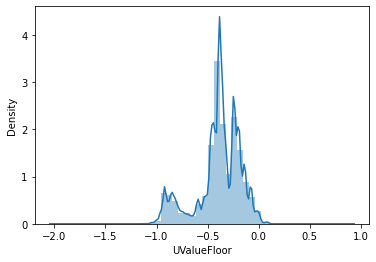

In [160]:
# Plot varaibles after log transformation
#sns.distplot(np.log10(ber_data['BerRating']),hist=True) #bi-modal
#sns.distplot(ber_data['BerRating'],hist=True) #bi-modal
#sns.distplot(np.log10(ber_data['UValueWall']),hist=True) #bi-modal
#sns.distplot(        ber_data['UValueWall'],hist=True) #bi-modal
sns.distplot(np.log10(ber_data['UValueFloor']),hist=True) #bi-modal
#sns.distplot(        ber_data['UValueFloor'],hist=True) #bi-modal
#sns.distplot(np.log10(ber_data['WHMainSystemEff']),hist=True) #bi-modal
#sns.distplot(        ber_data['WHMainSystemEff'],hist=True) #bi-modal
#sns.distplot(np.log10(ber_data['volume']),hist=True) #bi-modal
#sns.distplot(        ber_data['volume'],hist=True) #bi-modal
#sns.distplot(np.log(ber_data['HeatSystem']),hist=True) #bi-modal
#sns.distplot(        ber_data['HeatSystem'],hist=True) #bi-modal

Density plots of Independent varaibles

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volume', ylabel='Density'>

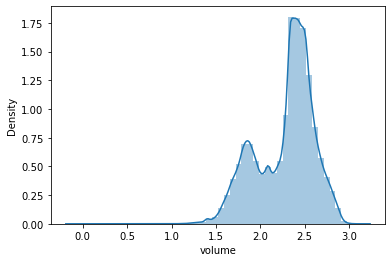

In [33]:
#Density plots of variables
sns.distplot(np.log10(ber_data['volume']),hist=True) #bi-modal
#sns.distplot(ber_data['volume'],hist=True) #bi-modal

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UValueWall', ylabel='Density'>

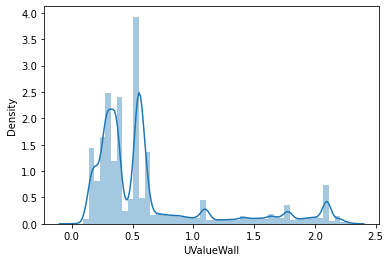

In [7]:
sns.distplot(ber_data['UValueWall'],hist=True) #highly skewed

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TempAdjustment', ylabel='Density'>

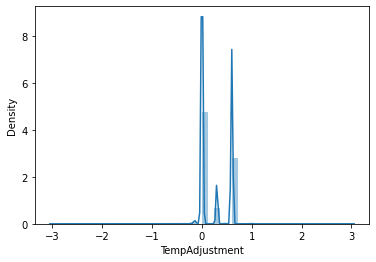

In [8]:
sns.distplot(ber_data['TempAdjustment'],hist=True)

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HeatSystemResponseCat', ylabel='Density'>

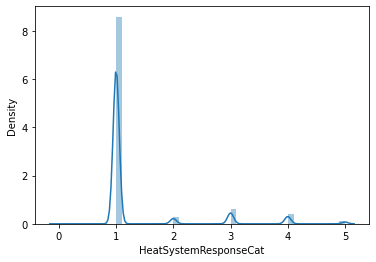

In [9]:
sns.distplot(ber_data['HeatSystemResponseCat'],hist=True)


C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UValueRoof', ylabel='Density'>

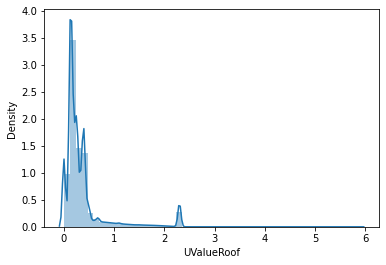

In [10]:
sns.distplot(ber_data['UValueRoof'],hist=True)


C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UValueFloor', ylabel='Density'>

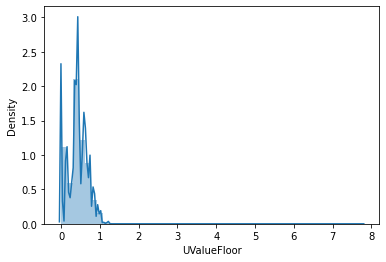

In [11]:
sns.distplot(ber_data['UValueFloor'],hist=True)

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FirstFloorHeight', ylabel='Density'>

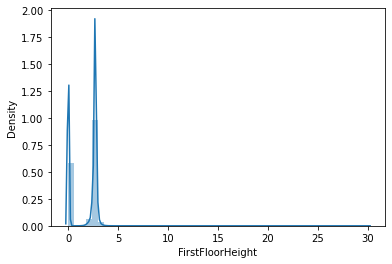

In [81]:
sns.distplot(ber_data['FirstFloorHeight'],hist=True)

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NoStoreys', ylabel='Density'>

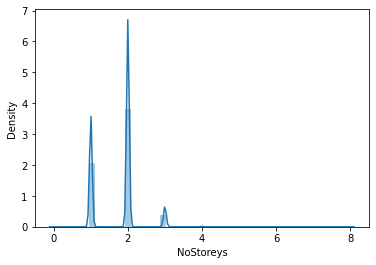

In [80]:
sns.distplot(ber_data['NoStoreys'],hist=True)

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WHMainSystemEff', ylabel='Density'>

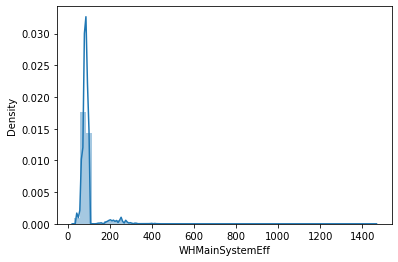

In [16]:
sns.distplot(ber_data['WHMainSystemEff'],hist=True)

C:\Users\jetpr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volume', ylabel='Density'>

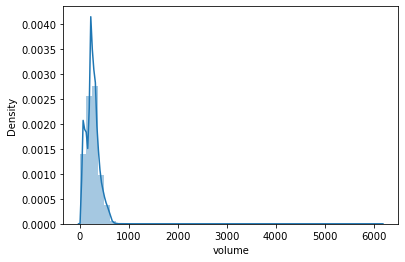

In [162]:
#sns.distplot(ber_cleaned_sw['GroundFloorArea(sq m)'],hist=True)
sns.distplot(ber_data['volume'],hist=True)

# Dimensionality Reduction

Here, two techniques will be investigated to determine whether fewer features could match or improve on metrics for using the full feature set.

These techniques are:

1. Pricipal Component Analysis (PCA)
2. Autoencoding

## 1. Imports

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 2 Principal Component Analysis

### 2.1 Preparing Data for PCA

In [ ]:
# Load csv file into dataframe
# This is a csv file containing features from the UK study mentioned
# in the paper
berSAP_df = pd.read_csv('berSAP.csv', low_memory=False)

In [ ]:
# Inspect leaded dataframe
berSAP_df.head(3)

,Unnamed: 0,index,CountyName,DwellingTypeDescr,Year_of_Construction,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,...,FloorArea,WindowArea,DoorArea,NoStoreys,HeatSystemControlCat,CylinderStat,GroundFloorHeight,ThermalMassCategory,LowEnergyLightingPercent,LivingAreaPercent
0,0,1,Co. Kerry,Detached house,1996,C3,202.72,262.98,0.55,0.32,...,166.66,65.88,3.12,2,1,NO,2.46,Medium,100.0,7.45304
1,1,2,Co. Donegal,Semi-detached house,2004,C2,184.06,118.14,0.55,0.40,...,59.07,15.27,4.07,2,2,NO,2.44,Medium-high,36.0,15.57470
2,2,3,Co. Kildare,End of terrace house,1970,D2,273.58,78.04,0.29,0.48,...,39.81,17.68,1.91,2,1,NO,2.44,Medium-high,57.0,18.43930


In [ ]:
# Drop non-numerical columns
# This was a mistake as these columns should have been encoded
# like which was done for the deep network autoencoding later in notebook
berSAP_df.drop(['index', 'Unnamed: 0', 'Year_of_Construction', 'CountyName', 'DwellingTypeDescr', 'ThermalMassCategory', 'CylinderStat'], axis=1, inplace=True)

In [ ]:
# Confirm that dataframe contains expected features and target
berSAP_df.head(3)

,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,FloorArea,WindowArea,DoorArea,NoStoreys,HeatSystemControlCat,GroundFloorHeight,LowEnergyLightingPercent,LivingAreaPercent
0,C3,202.72,262.98,0.55,0.32,0.36,2.82,3.00,123.38,207.08,166.66,65.88,3.12,2,1,2.46,100.0,7.45304
1,C2,184.06,118.14,0.55,0.40,0.41,2.32,2.95,92.93,59.07,59.07,15.27,4.07,2,2,2.44,36.0,15.57470
2,D2,273.58,78.04,0.29,0.48,0.84,2.20,2.89,77.15,39.82,39.81,17.68,1.91,2,1,2.44,57.0,18.43930


In [ ]:
# This function was needed to render plotly outpout in the
# notebook
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [ ]:
# View UValuesagainst BerRating
import plotly.express as px

features_1 = ['BerRating', 'UValueWall',	'UValueRoof',
            'UValueFloor',	'UValueWindow',	'UvalueDoor']

# Required to render the plotly plot
enable_plotly_in_cell()

fig = px.scatter_matrix(
    berSAP_df,
    dimensions=features_1,
    color="EnergyRating",
    height=800
)
fig.update_traces(diagonal_visible=False)
fig.update_yaxes(title_standoff=0)
fig.update_layout({"yaxis"+str(i+1): dict(title_standoff=15) for i in range(1,7)})
fig.show()

### 2.2 Performing PCA

In [ ]:
# Create X (features) and y (label)
X_for_PCA = berSAP_df.drop(['EnergyRating', 'BerRating'], axis=1)
y_for_PCA = berSAP_df['BerRating']

In [ ]:
# Standard scale three sets of X for projection to
# 11, 8 and 5 PCs
from sklearn.preprocessing import StandardScaler
X_for_PCA_fitted_11 = StandardScaler().fit_transform(X_for_PCA)
X_for_PCA_fitted_8 = StandardScaler().fit_transform(X_for_PCA)
X_for_PCA_fitted_5 = StandardScaler().fit_transform(X_for_PCA)

In [ ]:
# Invoke and fit PCA model with scaled Xs
from sklearn.decomposition import PCA
pca_11 = PCA(n_components=11)
pca_8 = PCA(n_components=8)
pca_5 = PCA(n_components=5)
principalComponents_11 = pca_11.fit_transform(X_for_PCA_fitted_11)
principalComponents_8 = pca_8.fit_transform(X_for_PCA_fitted_8)
principalComponents_5 = pca_5.fit_transform(X_for_PCA_fitted_5)

In [ ]:
# View PCs
principalComponents

array([[ 4.92027996, -0.7802198 , -0.61773245, ..., -1.68198585,
         1.18888581,  0.01024929],
       [ 0.17183408, -0.04018681,  1.06528429, ...,  0.18610465,
        -0.18504658,  0.16054355],
       [-0.51562004,  0.84817605,  1.00862034, ..., -0.62856486,
         0.81770835, -0.95867682],
       ...,
       [ 0.67788349,  2.89204883, -1.91793227, ...,  0.37365447,
         0.04451735,  0.25407927],
       [ 2.44923059,  3.30370868, -3.44098705, ..., -0.76309026,
         0.30153232, -1.09317263],
       [-4.10320234,  1.50961092, -3.27387956, ...,  0.29417502,
        -0.40874826,  0.08651912]])

In [ ]:
# Get explained variance for PCs
exp_var_pca_11 = pca_11.explained_variance_ratio_
exp_var_pca_8 = pca_8.explained_variance_ratio_
exp_var_pca_5 = pca_5.explained_variance_ratio_

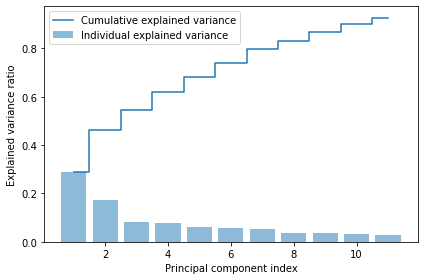

In [ ]:
# Create the visualization plot for 11 principal components
# to show explained variance
cum_sum_eigenvalues_11 = np.cumsum(exp_var_pca_11)

plt.bar(range(1,len(exp_var_pca_11) + 1), exp_var_pca_11, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues_11) + 1), cum_sum_eigenvalues_11, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

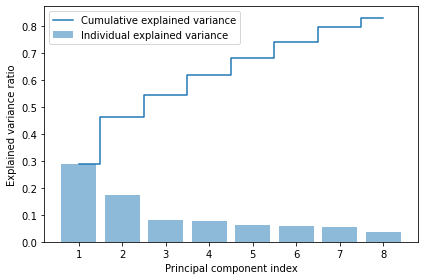

In [ ]:
# Create the visualization plot for 8 principal components
# to show explained variance
cum_sum_eigenvalues_8 = np.cumsum(exp_var_pca_8)

plt.bar(range(1,len(exp_var_pca_8) + 1), exp_var_pca_8, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues_8) + 1), cum_sum_eigenvalues_8, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

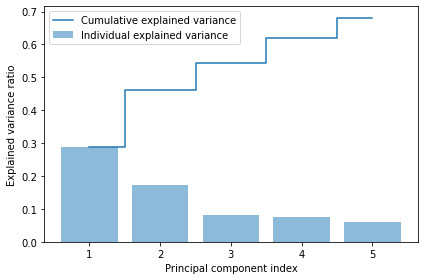

In [ ]:
# Create the visualization plot for 5 principal components
# to show explained variance
cum_sum_eigenvalues_5 = np.cumsum(exp_var_pca_5)

plt.bar(range(1,len(exp_var_pca_5) + 1), exp_var_pca_5, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues_5) + 1), cum_sum_eigenvalues_5, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

In [ ]:
# Isolate EnergyRating and BerRating to be joined to PC dataframes
energy_rating = berSAP_df['EnergyRating']
ber_rating = berSAP_df['BerRating']

In [ ]:
# Create dataframe for 11 PCs and join Energy and BerRating
principal_df_11 = pd.DataFrame(data = principalComponents_11, 
                 columns = ['pc 1', 'pc 2',
                            'pc 3', 'pc 4',
                            'pc 5', 'pc 6',
                            'pc 7', 'pc 8',
                            'pc 9', 'pc 10',
                            'pc 11'])

principal_df_11 = principal_df_11.join(energy_rating)
principal_df_11 = principal_df_11.join(ber_rating)
principal_df_11.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,pc 11,EnergyRating,BerRating
0,4.920280,-0.780220,-0.617732,0.502788,-1.681986,1.188886,0.010249,-0.723500,1.305155,-0.235347,0.127146,C3,202.72
1,0.171834,-0.040187,1.065284,-0.358314,0.186105,-0.185047,0.160544,0.192329,-0.074169,-0.173607,-0.211999,C2,184.06
2,-0.515620,0.848176,1.008620,-0.405925,-0.628565,0.817708,-0.958677,0.536054,-0.462026,-0.653818,0.958926,D2,273.58
3,-3.472261,-1.502866,-0.033354,0.713417,0.021000,0.767524,2.148603,-1.907552,0.892611,0.215502,0.940835,E2,361.76
4,2.380925,-0.311246,0.082743,-0.284728,0.294048,-0.913335,0.446619,-0.833363,-1.306073,0.212950,0.178659,B3,139.61


In [ ]:
# Create dataframe for 8 PCs and join Energy and BerRating
principal_df_8 = pd.DataFrame(data = principalComponents_8, 
                 columns = ['pc 1', 'pc 2',
                            'pc 3', 'pc 4',
                            'pc 5', 'pc 6',
                            'pc 7', 'pc 8'
                            ])

principal_df_8 = principal_df_8.join(energy_rating)
principal_df_8 = principal_df_8.join(ber_rating)

In [ ]:
# Create dataframe for 5 PCs and join Energy and BerRating
principal_df_5 = pd.DataFrame(data = principalComponents_5, 
                 columns = ['pc 1', 'pc 2',
                            'pc 3', 'pc 4',
                            'pc 5'
                            ])

principal_df_5 = principal_df_5.join(energy_rating)
principal_df_5 = principal_df_5.join(ber_rating)

In [ ]:
# Save dataframes for PCs to pickle files
principal_df_11.to_pickle('pc-11-df.pkl')
principal_df_8.to_pickle('pc-8-df.pkl')
principal_df_5.to_pickle('pc-5-df.pkl')

In [ ]:
# Create X and y for the dataframes from the
# previously generated PCs (11, 8 and 5)
from sklearn.model_selection import train_test_split

X_11 = principal_df_11.drop(['EnergyRating', 'BerRating'], axis=1)
y_11 = principal_df_11['BerRating']
X_11_train, X_11_test, y_11_train, y_11_test = train_test_split(
    X_11, y_11, test_size=0.2, random_state=42
)

X_8 = principal_df_8.drop(['EnergyRating', 'BerRating'], axis=1)
y_8 = principal_df_8['BerRating']
X_8_train, X_8_test, y_8_train, y_8_test = train_test_split(
    X_8, y_8, test_size=0.2, random_state=42
)

X_5 = principal_df_5.drop(['EnergyRating', 'BerRating'], axis=1)
y_5 = principal_df_5['BerRating']

X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(
    X_5, y_5, test_size=0.2, random_state=42
)

In [ ]:
# Fit the X and y values for PCs (11, 8 and 5)
# to sm.OLS to view model performance
import statsmodels.api as sm
X_const_11 = sm.add_constant(X_11)
model_11 = sm.OLS(y_11, X_const_11).fit()

X_const_8 = sm.add_constant(X_8)
model_8 = sm.OLS(y_8, X_const_8).fit()

X_const_5 = sm.add_constant(X_5)
model_5 = sm.OLS(y_5, X_const_5).fit()

### 2.3 PCA evaluation on Linear Regression (LR)

In [ ]:
# LR metrics on 11 PCs
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BerRating   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 2.384e+05
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:08:17   Log-Likelihood:            -5.5714e+06
No. Observations:              999394   AIC:                         1.114e+07
Df Residuals:                  999382   BIC:                         1.114e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        227.1079      0.064   3558.157      0.000     226.983     227.233
pc 1          -5.0180      0.030   -169.158      0.000      -5.076      -4.960
pc 2          58.2173      0.038   1519.668      0.000      58.142      58.292
pc 3         -20.5441      0.056   -368.779      0.000     -20.653     -20.435
pc 4          10.5054      0.058    181.401      0.000      10.392      10.619
pc 5           2.3307      0.065     36.049      0.000       2.204       2.457
pc 6           9.2531      0.066    140.901      0.000       9.124       9.382
pc 7          20.1253      0.068    294.842      0.000      19.992      20.259
pc 8          -2.7449      0.084    -32.871      0.000      -2.909      -2.581
pc 9          -4.5109      0.085    -52.892      0.000      -4.678      -4.344
pc 10          2.6642      0.090     29.701      0.000       2.488       2.840
pc 11          4.4793      0.095     47.378      0.000       4.294       4.665
==============================================================================
Omnibus:                   229994.738   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           889043.036
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       7.053   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# LR metrics on 8 PCs
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BerRating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 3.251e+05
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:08:34   Log-Likelihood:            -5.5744e+06
No. Observations:              999394   AIC:                         1.115e+07
Df Residuals:                  999385   BIC:                         1.115e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        227.1079      0.064   3547.662      0.000     226.982     227.233
pc 1          -5.0180      0.030   -168.659      0.000      -5.076      -4.960
pc 2          58.2173      0.038   1515.186      0.000      58.142      58.293
pc 3         -20.5441      0.056   -367.692      0.000     -20.654     -20.435
pc 4          10.5054      0.058    180.866      0.000      10.392      10.619
pc 5           2.3307      0.065     35.942      0.000       2.204       2.458
pc 6           9.2531      0.066    140.486      0.000       9.124       9.382
pc 7          20.1253      0.068    293.972      0.000      19.991      20.260
pc 8          -2.7449      0.084    -32.774      0.000      -2.909      -2.581
==============================================================================
Omnibus:                   238011.953   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           943739.178
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.178   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# # LR metrics on 5 PCs
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BerRating   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 4.504e+05
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:08:59   Log-Likelihood:            -5.6253e+06
No. Observations:              999394   AIC:                         1.125e+07
Df Residuals:                  999388   BIC:                         1.125e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        227.1079      0.067   3371.405      0.000     226.976     227.240
pc 1          -5.0180      0.031   -160.280      0.000      -5.079      -4.957
pc 2          58.2173      0.040   1439.908      0.000      58.138      58.297
pc 3         -20.5440      0.059   -349.424      0.000     -20.659     -20.429
pc 4          10.5055      0.061    171.881      0.000      10.386      10.625
pc 5           2.3307      0.068     34.156      0.000       2.197       2.464
==============================================================================
Omnibus:                   293360.948   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1214921.070
Skew:                           1.404   Prob(JB):                         0.00
Kurtosis:                       7.615   Cond. No.                         2.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3 Autoencoding

### 3.1 Data Preparation

In [ ]:
# Create X (features) and y (label)
X_for_AE = berSAP_df.drop(['EnergyRating', 'BerRating'], axis=1)
y_for_AE = berSAP_df['BerRating']

In [ ]:
# Scale X and y and split into training and test sets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Divide data in Train - Validation - Test
X_train, X_test, y_train, y_test = train_test_split(X_for_AE, y_for_AE, test_size=0.3, random_state=42)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

# Standardize Data
sc = StandardScaler()
X_tr_std = sc.fit_transform(X_tr)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

### 3.2 Undercomplete Linear Autoencoder (ULA)

In [ ]:
# Import keras to build Autoencoder
from tensorflow import keras

In [ ]:
# Create encodings of 11 features using ULA
encoder_11 = keras.models.Sequential([
    keras.layers.Dense(11, input_shape=[16]),
])

decoder_11 = keras.models.Sequential([
    keras.layers.Dense(16, input_shape=[11]),
])

autoencoder_11 = keras.models.Sequential([encoder_11, decoder_11])
autoencoder_11.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))

history = autoencoder_11.fit(X_tr_std,X_tr_std, epochs=100,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)])
codings_11 = encoder_11.predict(X_tr_std)

2022-04-04 22:08:08.517867: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-04 22:08:08.518813: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-04 22:08:08.523563: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-04 22:08:08.668594: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-04 22:08:08.670898: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3193960000 Hz


Epoch 1/100
17490/17490 [==============================] - 31s 2ms/step - loss: 0.1157 - val_loss: 0.0730
Epoch 2/100
17490/17490 [==============================] - 29s 2ms/step - loss: 0.0713 - val_loss: 0.0740
Epoch 3/100
17490/17490 [==============================] - 33s 2ms/step - loss: 0.0736 - val_loss: 0.0730
Epoch 4/100
17490/17490 [==============================] - 37s 2ms/step - loss: 0.0746 - val_loss: 0.0732
Epoch 5/100
17490/17490 [==============================] - 39s 2ms/step - loss: 0.0741 - val_loss: 0.0728
Epoch 6/100
17490/17490 [==============================] - 35s 2ms/step - loss: 0.0744 - val_loss: 0.0729
Epoch 7/100
17490/17490 [==============================] - 33s 2ms/step - loss: 0.0742 - val_loss: 0.0730
Epoch 8/100
17490/17490 [==============================] - 28s 2ms/step - loss: 0.0736 - val_loss: 0.0730
Epoch 9/100
17490/17490 [==============================] - 29s 2ms/step - loss: 0.0736 - val_loss: 0.0728
Epoch 10/100
17490/17490 [====================

In [ ]:
# Verify shape of encodings
codings_11.shape

(559660, 11)

In [ ]:
# Create encodings of 8 features using ULA
encoder_8 = keras.models.Sequential([
    keras.layers.Dense(8, input_shape=[16]),
])

decoder_8 = keras.models.Sequential([
    keras.layers.Dense(16, input_shape=[8]),
])

autoencoder_8 = keras.models.Sequential([encoder_8, decoder_8])
autoencoder_8.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))

history = autoencoder_8.fit(X_tr_std,X_tr_std, epochs=100,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)])
codings_8 = encoder_8.predict(X_tr_std)

Epoch 1/100
17490/17490 [==============================] - 29s 2ms/step - loss: 0.1949 - val_loss: 0.1704
Epoch 2/100
17490/17490 [==============================] - 30s 2ms/step - loss: 0.1702 - val_loss: 0.1733
Epoch 3/100
17490/17490 [==============================] - 26s 1ms/step - loss: 0.1724 - val_loss: 0.1710
Epoch 4/100
17490/17490 [==============================] - 25s 1ms/step - loss: 0.1681 - val_loss: 0.1706
Epoch 5/100
17490/17490 [==============================] - 26s 1ms/step - loss: 0.1682 - val_loss: 0.1720
Epoch 6/100
17490/17490 [==============================] - 29s 2ms/step - loss: 0.1700 - val_loss: 0.1711
Epoch 7/100
17490/17490 [==============================] - 27s 2ms/step - loss: 0.1746 - val_loss: 0.1715
Epoch 8/100
17490/17490 [==============================] - 27s 2ms/step - loss: 0.1703 - val_loss: 0.1710
Epoch 9/100
17490/17490 [==============================] - 30s 2ms/step - loss: 0.1703 - val_loss: 0.1711
Epoch 10/100
17490/17490 [====================

In [ ]:
# Create encodings of 5 features using ULA
encoder_5 = keras.models.Sequential([
    keras.layers.Dense(5, input_shape=[16]),
])

decoder_5 = keras.models.Sequential([
    keras.layers.Dense(16, input_shape=[5]),
])

autoencoder_5 = keras.models.Sequential([encoder_5, decoder_5])
autoencoder_5.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=0.1))

history = autoencoder_5.fit(X_tr_std,X_tr_std, epochs=100,validation_data=(X_valid_std,X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)])
codings_5 = encoder_5.predict(X_tr_std)

Epoch 1/100
17490/17490 [==============================] - 27s 2ms/step - loss: 0.3365 - val_loss: 0.3294
Epoch 2/100
17490/17490 [==============================] - 26s 2ms/step - loss: 0.3257 - val_loss: 0.3272
Epoch 3/100
17490/17490 [==============================] - 27s 2ms/step - loss: 0.3268 - val_loss: 0.3263
Epoch 4/100
17490/17490 [==============================] - 31s 2ms/step - loss: 0.3189 - val_loss: 0.3251
Epoch 5/100
17490/17490 [==============================] - 32s 2ms/step - loss: 0.3141 - val_loss: 0.3252
Epoch 6/100
17490/17490 [==============================] - 24s 1ms/step - loss: 0.3206 - val_loss: 0.3256
Epoch 7/100
17490/17490 [==============================] - 23s 1ms/step - loss: 0.3212 - val_loss: 0.3251
Epoch 8/100
17490/17490 [==============================] - 27s 2ms/step - loss: 0.3196 - val_loss: 0.3248
Epoch 9/100
17490/17490 [==============================] - 24s 1ms/step - loss: 0.3275 - val_loss: 0.3269
Epoch 10/100
17490/17490 [====================

### 3.3 ULA Evaluation

In [ ]:
# Fit OLS with encodings
import statsmodels.api as sm
codings_11_const = sm.add_constant(codings_11)
model_11_ae = sm.OLS(y_tr, codings_11_const).fit()

codings_8_const = sm.add_constant(codings_8)
model_8_ae = sm.OLS(y_tr, codings_8_const).fit()

codings_5_const = sm.add_constant(codings_5)
model_5_ae = sm.OLS(y_tr, codings_5_const).fit()

In [ ]:
# Metrics for LR on 11 UL encodings
model_11_ae.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BerRating   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.334e+05
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:39:47   Log-Likelihood:            -3.1203e+06
No. Observations:              559660   AIC:                         6.241e+06
Df Residuals:                  559648   BIC:                         6.241e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        233.8697      0.091   2579.601      0.000     233.692     234.047
x1            57.4422      0.203    283.410      0.000      57.045      57.839
x2           -25.9772      0.138   -188.196      0.000     -26.248     -25.707
x3           -53.5376      0.370   -144.725      0.000     -54.263     -52.813
x4            -4.8757      0.288    -16.958      0.000      -5.439      -4.312
x5            46.2588      0.186    248.350      0.000      45.894      46.624
x6           -40.1568      0.171   -234.457      0.000     -40.493     -39.821
x7           -33.4246      0.136   -245.986      0.000     -33.691     -33.158
x8            33.6390      0.195    172.491      0.000      33.257      34.021
x9            11.6953      0.229     51.074      0.000      11.247      12.144
x10           29.8525      0.174    171.986      0.000      29.512      30.193
x11           31.8833      0.156    203.776      0.000      31.577      32.190
==============================================================================
Omnibus:                   129593.835   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           503416.593
Skew:                           1.115   Prob(JB):                         0.00
Kurtosis:                       7.077   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Metrics for LR on 8 UL encodings
model_8_ae.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BerRating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 1.817e+05
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:40:30   Log-Likelihood:            -3.1221e+06
No. Observations:              559660   AIC:                         6.244e+06
Df Residuals:                  559651   BIC:                         6.244e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.1022      0.091   2633.697      0.000     238.924     239.280
x1           -63.4408      0.400   -158.489      0.000     -64.225     -62.656
x2            16.7636      0.241     69.462      0.000      16.291      17.237
x3            84.6442      0.185    457.185      0.000      84.281      85.007
x4           -15.8042      0.169    -93.409      0.000     -16.136     -15.473
x5           -41.2726      0.262   -157.815      0.000     -41.785     -40.760
x6             0.0445      0.183      0.243      0.808      -0.314       0.403
x7            37.7327      0.224    168.661      0.000      37.294      38.171
x8            48.1020      0.170    283.043      0.000      47.769      48.435
==============================================================================
Omnibus:                   133790.707   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           531308.855
Skew:                           1.144   Prob(JB):                         0.00
Kurtosis:                       7.189   Cond. No.                         5.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Autoencoding on the full dataset

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# Load full dataset into dataframe
ber_df = pd.read_csv('ber.csv', low_memory=False)

### Clean  Dataset

In [ ]:
# Check for missing values
# Some rows have over 70% missing values!
ber_df.isnull().sum()

Unnamed: 0                   0
index                        0
CountyName                   0
DwellingTypeDescr            0
Year_of_Construction         0
                         ...  
RER                     873690
RenewEPnren             873690
RenewEPren              873690
CPC                     761124
EPC                     761124
Length: 213, dtype: int64

In [ ]:
# Drop the Unnamed: 0 and index columns as they're duplicates
# of the actual index column
ber_df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [ ]:
# Drop columns with more than 80000 missing values
columns_to_drop = (ber_df.isnull().sum() > 80000)

In [ ]:
# Verify that boolean values were generated correctly 
columns_to_drop

CountyName              False
DwellingTypeDescr       False
Year_of_Construction    False
TypeofRating            False
EnergyRating            False
                        ...  
RER                      True
RenewEPnren              True
RenewEPren               True
CPC                      True
EPC                      True
Length: 211, dtype: bool

In [ ]:
# Create dataframe with boolean values for columns
# to be dropped based on boolean value
columns_to_drop_df = pd.DataFrame(columns_to_drop, columns=['rows_to_drop'])

In [ ]:
# Verify that dataframe was created
columns_to_drop_df

,rows_to_drop
CountyName,False
DwellingTypeDescr,False
Year_of_Construction,False
TypeofRating,False
EnergyRating,False
...,...
RER,True
RenewEPnren,True
RenewEPren,True
CPC,True


In [ ]:
# Create a list of column names with a boolean
# value of True. These will be dropped as they
# contain too many missing values
columns_to_drop_list = []
for index, row in columns_to_drop_df.iterrows():
    if row['rows_to_drop'] == True:
        columns_to_drop_list.append(index)

In [ ]:
# Confirm number of columns to be dropped (84)
len(columns_to_drop_list)

84

In [ ]:
# Drop columns with too many missing values
ber_df.drop(columns_to_drop_list, axis=1, inplace=True)

In [ ]:
# Confirm how many missing values are now present
# in dataset
ber_df.isnull().sum().sort_values()

CountyName                          0
NoCentralHeatingPumps               0
CHBoilerThermostatControlled        0
NoOilBoilerHeatingPumps             0
OBBoilerThermostatControlled        0
                                ...  
CO2MainSpace                    34725
DeliveredEnergyPumpsFans        37783
DeliveredLightingEnergy         37783
CO2Lighting                     37783
CO2PumpsFans                    37783
Length: 127, dtype: int64

In [ ]:
# Reconfirm the number of rows in the dataset
# Dropping up to 37783 rows from 1011555 will 
# mean dropping 3.7% of the dataset
len(ber_df)

1011555

In [ ]:
# Drop the rows still containing missing values
ber_df.dropna(axis=0, inplace=True)

In [ ]:
# Check the number of rows in the dataset (937580) after 
# dropping missing values and check whether any values are
# still missing
print(len(ber_df))
print(ber_df.isnull().sum())

937580
CountyName                0
DwellingTypeDescr         0
Year_of_Construction      0
TypeofRating              0
EnergyRating              0
                         ..
FirstWallArea             0
FirstWallUValue           0
FirstWallIsSemiExposed    0
FirstWallAgeBandId        0
FirstWallTypeId           0
Length: 127, dtype: int64


In [ ]:
# Inspect the dataframe to get an idea of which features
# are still present. We've still got 127 columns to work
# with
ber_df

,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,ThirdEnerProdConvFactor,ThirdEnerProdCO2EmissionFactor,ThirdEnerConsumedDelivered,ThirdEnerConsumedConvFactor,ThirdEnerConsumedCO2EmissionFactor,FirstWallArea,FirstWallUValue,FirstWallIsSemiExposed,FirstWallAgeBandId,FirstWallTypeId
0,Co. Kerry,Detached house,1996,Existing,C3,202.72,262.98,0.55,0.32,0.36,...,0.0,0.0,0.0,0.0,0.0,123.38,0.55,No,8.0,4.0
1,Co. Donegal,Semi-detached house,2004,Existing,C2,184.06,118.14,0.55,0.40,0.41,...,0.0,0.0,0.0,0.0,0.0,92.93,0.55,No,9.0,5.0
2,Co. Kildare,End of terrace house,1970,Existing,D2,273.58,78.04,0.29,0.48,0.84,...,0.0,0.0,0.0,0.0,0.0,77.15,0.29,No,5.0,4.0
3,Dublin 8,Mid-floor apartment,2000,Existing,E2,361.76,46.92,0.72,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,27.13,0.55,No,9.0,11.0
4,Co. Roscommon,Detached house,1981,Existing,B3,139.61,182.66,0.43,0.29,0.63,...,0.0,0.0,0.0,0.0,0.0,163.77,0.42,No,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011541,Dublin 1,Mid-floor apartment,1995,Existing,C2,194.40,39.21,0.50,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,9.21,0.55,No,8.0,10.0
1011546,Co. Leitrim,Detached house,2006,Existing,B1,77.69,181.04,0.37,0.13,0.37,...,0.0,0.0,0.0,0.0,0.0,179.28,0.37,No,10.0,5.0
1011547,Dublin 6,End of terrace house,1984,Existing,C3,209.11,58.51,0.59,0.49,0.64,...,0.0,0.0,0.0,0.0,0.0,27.48,0.60,No,7.0,10.0
1011551,Co. Wexford,Detached house,2021,Final,A2,42.51,275.92,0.18,0.13,0.12,...,0.0,0.0,0.0,0.0,0.0,237.60,0.18,No,11.0,5.0


In [ ]:
# Based on work we did earlier, some of the outliers
# for BerRating are removed here by removing values
# above and below 3 standard deviations from the mean
ber_normal_df = ber_df[ (ber_df['BerRating'] <= (ber_df['BerRating'].mean() + 3*ber_df['BerRating'].std() )) &
    (ber_df['BerRating'] >= (ber_df['BerRating'].mean() - 3*ber_df['BerRating'].std() )) ]

In [ ]:
# Drop CountyName as it'll create to many columns when one-hot
# encoded and is not important when looking at the Irish
# and English studies referenced in our related work
ber_normal_df.drop('CountyName', axis=1, inplace=True)

/home/johann/miniconda3/envs/gcai/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### EDA to get an idea of what needs to be encoded/transformed

Identify columnns with a non-numerical datatype as these will need be encoded before being used in Autoencoding. These columns are then explored in terms of value counts to get a feel for the number of features that will be created after one-hot encoding.

Plots are alos created for our paper here.

In [ ]:
# Get a list of columns with an object, i.e.
# non-numerical data type
ber_normal_df.select_dtypes(include=['object']).columns

Index(['DwellingTypeDescr', 'TypeofRating', 'EnergyRating',
       'MainSpaceHeatingFuel', 'MainWaterHeatingFuel', 'MultiDwellingMPRN',
       'DraftLobby', 'VentilationMethod', 'StructureType',
       'SuspendedWoodenFloor', 'PermeabilityTest',
       'CHBoilerThermostatControlled', 'OBBoilerThermostatControlled',
       'OBPumpInsideDwelling', 'WarmAirHeatingSystem', 'UndergroundHeating',
       'CylinderStat', 'CombinedCylinder', 'SWHPumpSolarPowered',
       'ChargingBasisHeatConsumed', 'ThermalMassCategory', 'PurposeOfRating',
       'DateOfAssessment', 'FirstEnergyType_Description',
       'SecondEnergyType_Description', 'ThirdEnergyType_Description',
       'FirstWallIsSemiExposed'],
      dtype='object')

In [ ]:
ber_normal_df['FirstWallIsSemiExposed'].value_counts()

No     912729
Yes     13717
Name: FirstWallIsSemiExposed, dtype: int64

In [ ]:
ber_normal_df['SecondEnergyType_Description'].value_counts()

Renewable Thermal       922922
Renewable Electrical      2869
Not Renewable              655
Name: SecondEnergyType_Description, dtype: int64

In [ ]:
ber_normal_df['FirstEnergyType_Description'].value_counts()

Renewable Thermal       877707
Renewable Electrical     47983
Not Renewable              756
Name: FirstEnergyType_Description, dtype: int64

In [ ]:
ber_normal_df['ThermalMassCategory'].value_counts()

Medium         429846
Medium-high    245567
Medium-low     120319
High            95763
Low             34951
Name: ThermalMassCategory, dtype: int64

In [ ]:
ber_normal_df['ChargingBasisHeatConsumed'].value_counts()

NO    926446
Name: ChargingBasisHeatConsumed, dtype: int64

In [ ]:
ber_normal_df['SWHPumpSolarPowered'].value_counts()

NO     925093
YES      1353
Name: SWHPumpSolarPowered, dtype: int64

In [ ]:
ber_normal_df['CombinedCylinder'].value_counts()

NO     887993
YES     38453
Name: CombinedCylinder, dtype: int64

In [ ]:
ber_normal_df['CylinderStat'].value_counts()

NO     893285
YES     33161
Name: CylinderStat, dtype: int64

In [ ]:
ber_normal_df['UndergroundHeating'].value_counts()

NO     898264
YES     28182
Name: UndergroundHeating, dtype: int64

In [ ]:
ber_normal_df['WarmAirHeatingSystem'].value_counts()

NO     924484
YES      1962
Name: WarmAirHeatingSystem, dtype: int64

In [ ]:
ber_normal_df['OBPumpInsideDwelling'].value_counts()

NO     853670
YES     72776
Name: OBPumpInsideDwelling, dtype: int64

In [ ]:
ber_normal_df['OBBoilerThermostatControlled'].value_counts()

NO     838483
YES     87963
Name: OBBoilerThermostatControlled, dtype: int64

In [ ]:
ber_normal_df['CHBoilerThermostatControlled'].value_counts()

NO     537543
YES    388903
Name: CHBoilerThermostatControlled, dtype: int64

In [ ]:
ber_normal_df['PermeabilityTest'].value_counts()

NO     836615
YES     89831
Name: PermeabilityTest, dtype: int64

In [ ]:
ber_normal_df['SuspendedWoodenFloor'].value_counts()

No                845765
Yes (Unsealed)     62750
Yes (Sealed)       17931
Name: SuspendedWoodenFloor, dtype: int64

In [ ]:
ber_normal_df['StructureType'].value_counts()

Masonry                    794377
Please select               69809
Timber or Steel Frame       56399
Insulated Conctete Form      5861
Name: StructureType, dtype: int64

In [ ]:
ber_normal_df['VentilationMethod'].value_counts()

Natural vent.                     873394
Whole house extract vent.          28878
Bal.whole mech.vent heat recvr     22286
Pos input vent.- loft               1202
Bal.whole mech.vent no heat re       350
Pos input vent.- outside             336
Name: VentilationMethod, dtype: int64

In [ ]:
ber_normal_df['DraftLobby'].value_counts()

NO     761769
YES    164677
Name: DraftLobby, dtype: int64

In [ ]:
ber_normal_df['MultiDwellingMPRN'].value_counts()

NO     921058
YES      5388
Name: MultiDwellingMPRN, dtype: int64

In [ ]:
# This column in parti
ber_normal_df['MainWaterHeatingFuel'].value_counts()

Mains Gas                         363846
Heating Oil                       335080
Electricity                       176097
Solid Multi-Fuel                   26186
Bulk LPG (propane or butane)       12830
Manufactured Smokeless Fuel         5097
House Coal                          2765
Wood Pellets (bulk supply for       1223
Bottled LPG                         1130
Sod Peat                            1108
Wood Logs                            516
Peat Briquettes                      229
Wood Pellets (in bags for seco       188
Anthracite                            74
Wood Chips                            64
Biodiesel from renewable sourc         7
Bioethanol from renewable sour         6
Name: MainWaterHeatingFuel, dtype: int64

In [ ]:
ber_normal_df['MainSpaceHeatingFuel'].value_counts()

Mains Gas                         365777
Heating Oil                       337910
Electricity                       171316
Solid Multi-Fuel                   26214
Bulk LPG (propane or butane)       12896
Manufactured Smokeless Fuel         5224
House Coal                          2680
Wood Pellets (bulk supply for       1270
Sod Peat                            1053
Bottled LPG                         1040
Wood Logs                            554
Peat Briquettes                      222
Wood Pellets (in bags for seco       181
Anthracite                            54
Wood Chips                            50
Biodiesel from renewable sourc         3
Electricity - Standard Domesti         1
Bioethanol from renewable sour         1
Name: MainSpaceHeatingFuel, dtype: int64

In [ ]:
ber_normal_df['ThirdEnerProdConvFactor'].value_counts()

0.00    926172
2.08       126
2.19       110
2.37        22
2.45        13
1.10         2
2.70         1
Name: ThirdEnerProdConvFactor, dtype: int64

In [ ]:
ber_normal_df['TypeofRating'].value_counts()

Existing       827271
Final           80435
Provisional     18740
Name: TypeofRating, dtype: int64

In [ ]:
ber_normal_df['DwellingTypeDescr'].value_counts()

Semi-detached house       260827
Detached house            260712
Mid-terrace house         135679
End of terrace house       72270
Mid-floor apartment        55859
Top-floor apartment        49334
Ground-floor apartment     48184
House                      30572
Maisonette                 10119
Apartment                   2623
Basement Dwelling            267
Name: DwellingTypeDescr, dtype: int64

In [ ]:
# Drop these columns as they're useless
columns_to_drop = [
    'PurposeOfRating', 'DateOfAssessment',
    'ChargingBasisHeatConsumed'
]

ber_normal_df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# Save this cleaned dataframe to pickle file
ber_normal_df.to_pickle('ber_normal_for_encoding.pkl')

In [ ]:
# Load the pickle file to continue working
# with the cleaned dataset from here onwards
ber_normal_df = pd.read_pickle('ber_normal_for_encoding.pkl')

In [ ]:
# Check whether any boolean values exist in the dataset
ber_normal_df.select_dtypes(['bool'])

""
0
1
2
3
4
...
1011541
1011546
1011547
1011551


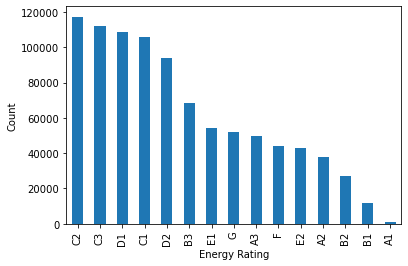

In [ ]:
# Plot the value counts for EnergyRating
ax = ber_normal_df['EnergyRating'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
ax.set_xlabel('Energy Rating')
ax.set_ylabel('Count');

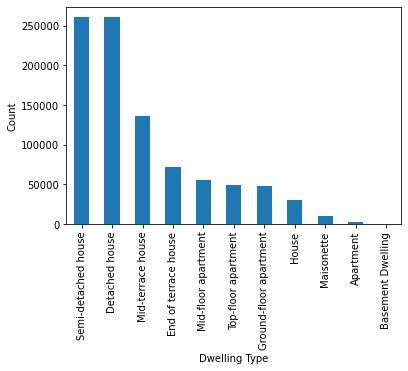

In [ ]:
# Plot the value counts for Delling Type Description
ax = ber_normal_df['DwellingTypeDescr'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
ax.set_xlabel('Dwelling Type')
ax.set_ylabel('Count');

A random sample of the dataset needed to be created in order for meaningful visualisation of scatter plots as using the full dataset generated meaningless and uniterpretable blobs.

In [ ]:
# Get a sample of the dataset wit ha random state of 30
df_sample = ber_normal_df.sample(frac=0.0005, random_state=30)

In [ ]:
# Inspect the sample dataset. It's got 463 rows and
# 123 columns
df_sample

,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,...,ThirdEnerProdConvFactor,ThirdEnerProdCO2EmissionFactor,ThirdEnerConsumedDelivered,ThirdEnerConsumedConvFactor,ThirdEnerConsumedCO2EmissionFactor,FirstWallArea,FirstWallUValue,FirstWallIsSemiExposed,FirstWallAgeBandId,FirstWallTypeId
679078,Semi-detached house,1998,Existing,D1,227.46,103.95,0.27,0.15,0.44,2.70,...,0.0,0.0,0.0,0.0,0.0,102.16,0.27,No,8.0,4.0
255879,Ground-floor apartment,1984,Existing,B3,138.42,390.07,0.30,0.30,0.57,3.10,...,0.0,0.0,0.0,0.0,0.0,241.61,0.31,No,7.0,5.0
702569,Detached house,1995,Existing,C3,223.63,120.90,0.36,0.23,0.44,2.84,...,0.0,0.0,0.0,0.0,0.0,92.26,0.31,No,8.0,4.0
571753,End of terrace house,2006,Existing,C2,196.65,83.50,0.37,0.20,0.34,2.42,...,0.0,0.0,0.0,0.0,0.0,83.05,0.37,No,10.0,8.0
660653,Detached house,1850,Existing,E2,340.26,248.00,2.10,0.40,0.73,4.57,...,0.0,0.0,0.0,0.0,0.0,183.00,2.10,No,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518927,Mid-terrace house,2019,Provisional,A3,58.27,70.95,0.20,0.15,0.18,1.30,...,0.0,0.0,0.0,0.0,0.0,56.00,0.20,No,0.0,8.0
418368,Mid-terrace house,2019,Final,A3,50.45,106.34,0.19,0.12,0.14,1.24,...,0.0,0.0,0.0,0.0,0.0,49.44,0.19,No,10.0,5.0
123753,Mid-terrace house,1986,Existing,C1,155.39,81.00,0.33,0.13,0.48,2.94,...,0.0,0.0,0.0,0.0,0.0,40.20,0.33,No,7.0,4.0
956641,Mid-terrace house,1953,Existing,E1,324.73,90.18,2.10,0.77,0.56,3.40,...,0.0,0.0,0.0,0.0,0.0,46.83,2.10,No,4.0,10.0


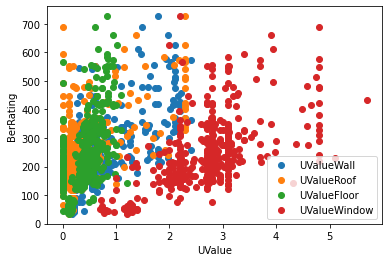

In [ ]:
# Plot U-values against BER
plt.scatter(df_sample['UValueWall'], df_sample['BerRating'])
plt.scatter(df_sample['UValueRoof'], df_sample['BerRating'])
plt.scatter(df_sample['UValueFloor'], df_sample['BerRating'])
plt.scatter(df_sample['UValueWindow'], df_sample['BerRating'])
plt.legend(["UValueWall", "UValueRoof", "UValueFloor", "UValueWindow"])
plt.xlabel('UValue')
plt.ylabel('BerRating');

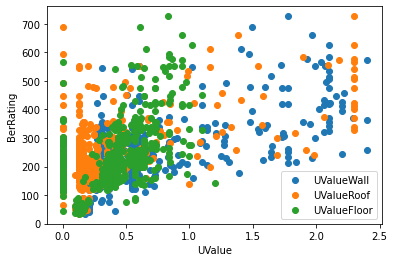

In [ ]:
# Plot U-values against BER, but leave out UValueWindow as
# it contains higher U-values ans doesn't allow for proper
# visualisation of the other U-values against BER
plt.scatter(df_sample['UValueWall'], df_sample['BerRating'])
plt.scatter(df_sample['UValueRoof'], df_sample['BerRating'])
plt.scatter(df_sample['UValueFloor'], df_sample['BerRating'])
plt.legend(["UValueWall", "UValueRoof", "UValueFloor"])
plt.xlabel('UValue')
plt.ylabel('BerRating');

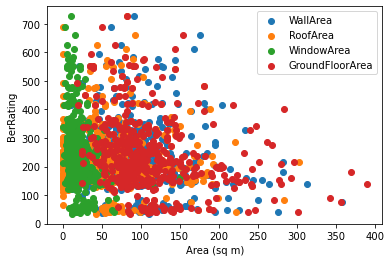

In [ ]:
# Plot area values against BER
plt.scatter(df_sample_1['WallArea'], df_sample_1['BerRating'])
plt.scatter(df_sample_1['RoofArea'], df_sample_1['BerRating'])
plt.scatter(df_sample_1['WindowArea'], df_sample_1['BerRating'])
plt.scatter(df_sample_1['GroundFloorArea(sq m)'], df_sample_1['BerRating'])
plt.legend(["WallArea", "RoofArea", "WindowArea", "GroundFloorArea"])
plt.xlabel('Area (sq m)')
plt.ylabel('BerRating');

## Performing the Autoencoding

In [ ]:
# Drop EnergyRating as it won't be needed for the encoding
ber_normal_df.drop('EnergyRating', axis=1, inplace=True)

In [ ]:
# Create X (features) and y (label)
X = ber_normal_df.drop('BerRating', axis=1)
y = ber_normal_df['BerRating']

In [ ]:
# Get the columns with numerical and object data types
# for min-max scaling and one-hot encoding respectively 
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Create a column transformer to for min-max scaling and one-hot encoding
# of numerical and categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
t = [('cat', OneHotEncoder(), categorical_cols), ('num', MinMaxScaler(), numerical_cols)]
col_transform = ColumnTransformer(transformers=t)

In [ ]:
# Use the column tranformer on the X variable
X_transformed = col_transform.fit_transform(X)

In [ ]:
# Create training, validation and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Confirm the shape of X_train variable
# There are now 197 features after encoding
X_train.shape

(648512, 197)

In [ ]:
# Confirm the shape of X_test variable
X_test.shape

(277934, 197)

In [ ]:
# Confirm the shape of X_valid variable
X_valid.shape

(129703, 197)

In [ ]:
# Import Keras to create the Non-Linear Stacked Encoder (NLSE)
from tensorflow import keras

2022-04-06 19:19:35.040238: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
# The encoder redices the dataset down to 11 featuers
nl_st_encoder = keras.models.Sequential([
    keras.layers.Dense(90, input_shape=[197], activation='relu'),
    keras.layers.Dense(30, activation='selu'),
    keras.layers.Dense(11, activation='selu'),
])

# The decoder tries to reverse this to get the original
# 197 features
nl_st_decoder = keras.models.Sequential([
    keras.layers.Dense(30, input_shape=[11], activation='selu'),
    keras.layers.Dense(90, activation='selu'),
    keras.layers.Dense(197, activation='relu'),
])

# Create the actual autoencoder and set the loss (mse)
# and optimizer (SGD)
nl_st_autoencoder = keras.models.Sequential([nl_st_encoder, nl_st_decoder])
nl_st_autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=1, decay=1e-4))
nl_st_autoencoder.summary()

# Train the model and use X_valid for validation as the model is being trained
history = nl_st_autoencoder.fit(X_train,X_train, epochs=50,validation_data=(X_valid,X_valid),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)

# Generate the readuced features on X_train and X_test
nl_st_codings_train = nl_st_encoder.predict(X_train)
nl_st_codings_test = nl_st_encoder.predict(X_test)

2022-04-06 19:19:52.229511: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-06 19:19:52.230189: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-06 19:19:52.289862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-06 19:19:52.290010: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3070 Laptop GPU computeCapability: 8.6
coreClock: 1.56GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-04-06 19:19:52.290033: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-06 19:19:52.291663: I tensorflow/stream_executor/p

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                20860     
_________________________________________________________________
sequential_1 (Sequential)    (None, 197)               21047     
Total params: 41,907
Trainable params: 41,907
Non-trainable params: 0
_________________________________________________________________


2022-04-06 19:28:51.970991: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 511027456 exceeds 10% of free system memory.
2022-04-06 19:28:52.399935: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 511027456 exceeds 10% of free system memory.
2022-04-06 19:28:52.830581: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-06 19:28:52.830998: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3193960000 Hz


Epoch 1/50


2022-04-06 19:28:53.184653: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


20266/20266 [==============================] - 166s 3ms/step - loss: 0.0205 - val_loss: 0.0087
Epoch 2/50
20266/20266 [==============================] - 56s 3ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 3/50
20266/20266 [==============================] - 56s 3ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 4/50
20266/20266 [==============================] - 56s 3ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 5/50
20266/20266 [==============================] - 56s 3ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 6/50
20266/20266 [==============================] - 58s 3ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 7/50
20266/20266 [==============================] - 57s 3ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 8/50
20266/20266 [==============================] - 56s 3ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 9/50
20266/20266 [==============================] - 57s 3ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 10/50
20266/20266 [==============================] - 57s 3m

2022-04-06 20:18:13.871664: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 511027456 exceeds 10% of free system memory.
2022-04-06 20:18:35.243713: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 219011992 exceeds 10% of free system memory.


In [ ]:
# Fit a LR with the generated encodings
import statsmodels.api as sm
X_const_nl_st = sm.add_constant(nl_st_codings_train)
model = sm.OLS(y_train, X_const_nl_st).fit()

In [ ]:
# Get the metric of LR on the encodings from the NLSE
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BerRating   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                 6.126e+04
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:50:28   Log-Likelihood:            -3.8177e+06
No. Observations:              648512   AIC:                         7.636e+06
Df Residuals:                  648501   BIC:                         7.636e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        335.0746      0.764    438.368      0.000     333.576     336.573
x1            -7.4169      0.159    -46.734      0.000      -7.728      -7.106
x2            10.5377      0.160     65.797      0.000      10.224      10.852
x3            -7.8138      0.131    -59.834      0.000      -8.070      -7.558
x4            32.1072      0.325     98.827      0.000      31.470      32.744
x5           -34.6174      0.108   -320.599      0.000     -34.829     -34.406
x6             2.1818      0.181     12.031      0.000       1.826       2.537
x7           -45.6064      0.110   -414.852      0.000     -45.822     -45.391
x8             5.8178      0.117     49.703      0.000       5.588       6.047
x9             0.2251      0.188      1.198      0.231      -0.143       0.594
x10           37.6786      0.165    228.755      0.000      37.356      38.001
==============================================================================
Omnibus:                   185821.818   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           625337.702
Skew:                           1.445   Prob(JB):                         0.00
Kurtosis:                       6.845   Cond. No.                         46.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Reduce 197 features to five features using NLSE
nl_st_encoder_5 = keras.models.Sequential([
    keras.layers.Dense(90, input_shape=[197], activation='relu'),
    keras.layers.Dense(20, activation='selu'),
    keras.layers.Dense(5, activation='selu'),
])

# The decoder tries to reverse this to get the original
# 197 features
nl_st_decoder_5 = keras.models.Sequential([
    keras.layers.Dense(20, input_shape=[5], activation='selu'),
    keras.layers.Dense(90, activation='selu'),
    keras.layers.Dense(197, activation='relu'),
])

# Create the actual autoencoder and set the loss (mse)
# and optimizer (SGD)
nl_st_autoencoder_5 = keras.models.Sequential([nl_st_encoder_5, nl_st_decoder_5])
nl_st_autoencoder_5.compile(loss='mse', optimizer = keras.optimizers.SGD(lr=1, decay=1e-4))
nl_st_autoencoder_5.summary()

# Train the model and use X_valid for validation as the model is being trained
history_5 = nl_st_autoencoder_5.fit(X_train,X_train, epochs=50,validation_data=(X_valid,X_valid),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)

# Generate the readuced features on X_train and X_test
nl_st_codings_train_5 = nl_st_encoder.predict(X_train)
nl_st_codings_test_5 = nl_st_encoder.predict(X_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 5)                 19745     
_________________________________________________________________
sequential_4 (Sequential)    (None, 197)               19937     
Total params: 39,682
Trainable params: 39,682
Non-trainable params: 0
_________________________________________________________________


2022-04-06 20:52:55.911979: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 511027456 exceeds 10% of free system memory.


Epoch 1/50
20266/20266 [==============================] - 56s 3ms/step - loss: 0.0259 - val_loss: 0.0148
Epoch 2/50
20266/20266 [==============================] - 60s 3ms/step - loss: 0.0145 - val_loss: 0.0140
Epoch 3/50
20266/20266 [==============================] - 59s 3ms/step - loss: 0.0139 - val_loss: 0.0136
Epoch 4/50
20266/20266 [==============================] - 59s 3ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 5/50
20266/20266 [==============================] - 59s 3ms/step - loss: 0.0133 - val_loss: 0.0131
Epoch 6/50
20266/20266 [==============================] - 59s 3ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 7/50
20266/20266 [==============================] - 59s 3ms/step - loss: 0.0130 - val_loss: 0.0129
Epoch 8/50
20266/20266 [==============================] - 59s 3ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 9/50
20266/20266 [==============================] - 59s 3ms/step - loss: 0.0128 - val_loss: 0.0127
Epoch 10/50
20266/20266 [==============================

In [ ]:
# Get the metrics for LR on the 5 generated encodings.
# It's the same as for the 11 generated features. Strange!
X_const_nl_st_5 = sm.add_constant(nl_st_codings_train_5)
model_5 = sm.OLS(y_train, X_const_nl_st_5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BerRating   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                 6.126e+04
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:43:54   Log-Likelihood:            -3.8177e+06
No. Observations:              648512   AIC:                         7.636e+06
Df Residuals:                  648501   BIC:                         7.636e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        335.0746      0.764    438.368      0.000     333.576     336.573
x1            -7.4169      0.159    -46.734      0.000      -7.728      -7.106
x2            10.5377      0.160     65.797      0.000      10.224      10.852
x3            -7.8138      0.131    -59.834      0.000      -8.070      -7.558
x4            32.1072      0.325     98.827      0.000      31.470      32.744
x5           -34.6174      0.108   -320.599      0.000     -34.829     -34.406
x6             2.1818      0.181     12.031      0.000       1.826       2.537
x7           -45.6064      0.110   -414.852      0.000     -45.822     -45.391
x8             5.8178      0.117     49.703      0.000       5.588       6.047
x9             0.2251      0.188      1.198      0.231      -0.143       0.594
x10           37.6786      0.165    228.755      0.000      37.356      38.001
==============================================================================
Omnibus:                   185821.818   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           625337.702
Skew:                           1.445   Prob(JB):                         0.00
Kurtosis:                       6.845   Cond. No.                         46.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Random Forest

Further exploration of models

In [163]:
from sklearn.ensemble import RandomForestRegressor # for building the model

# Initializing the Random Forest Regression model with 10 decision trees
RF = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
RF.fit(x_train, y_train) 

# Predicting the target values of the test set
y_pred = RF.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 0.06


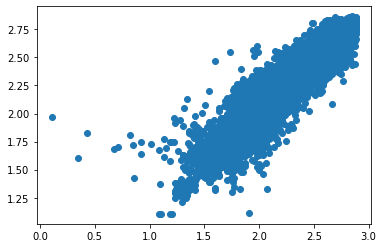

In [164]:
predictions = RF.predict(x_test)
plt.scatter(y_test, predictions)

(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 7.0000e+00, 2.2000e+01,
        2.5500e+02, 5.8472e+04, 7.9954e+04, 1.7600e+02, 4.0000e+00]),
 array([-1.86053891, -1.59550962, -1.33048033, -1.06545105, -0.80042176,
        -0.53539247, -0.27036318, -0.0053339 ,  0.25969539,  0.52472468,
         0.78975396]),
 <BarContainer object of 10 artists>)

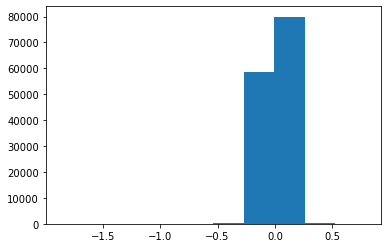

In [165]:
plt.hist(y_test - predictions)


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(RF, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

>0.1 0.855 (0.032)
>0.2 0.874 (0.027)
>0.3 0.883 (0.028)
>0.4 0.890 (0.025)
>0.5 0.895 (0.028)
>0.6 0.896 (0.026)
>0.7 0.899 (0.028)
>0.8 0.901 (0.023)
>0.9 0.899 (0.026)
>1.0 0.903 (0.025)


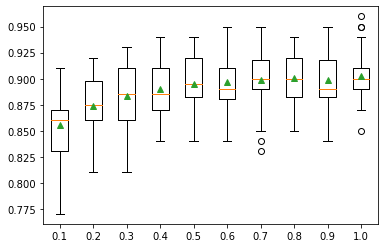

In [45]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot



# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, x, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, x, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()